## **Data Cleaning, Feature Selection, Modeling and Interpretability into one report**

Abstract: This report consolidates the efforts of data cleaning, feature selection, modeling, and interpretability
to predict chronic kidney disease (CKD) using various clinical parameters. Through comprehensive data cleaning,
insightful feature selection, rigorous modeling, and detailed interpretability analysis, we aim to understand
the factors influencing CKD and improve prediction accuracy.

In [ ]:
# Download the file from GitHub
!wget https://raw.githubusercontent.com/vikram17036/DSMT/main/kidney_disease1.csv -O kidney_disease2.csv
# Import pandas
import pandas as pd

# Load the downloaded CSV file into a pandas DataFrame
df = pd.read_csv('kidney_disease2.csv')

# Display the first few rows of the DataFrame
print(df.head())

--2024-04-02 22:53:30--  https://raw.githubusercontent.com/vikram17036/DSMT/main/kidney_disease1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42107 (41K) [text/plain]
Saving to: ‘kidney_disease2.csv’

kidney_disease2.csv 100%[===================>]  41.12K  --.-KB/s    in 0.001s  

2024-04-02 22:53:30 (33.8 MB/s) - ‘kidney_disease2.csv’ saved [42107/42107]

    age    bp     sg   al   su     rbc        pc         pcc          ba  \
0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4  51.0  80.0  1.010  

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot
from google.colab import files
from sklearn.impute import SimpleImputer
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.metrics import mean_squared_error
import random, os, sys
from datetime import datetime
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from scipy.stats import pearsonr
sns.set(rc={"figure.figsize": (16, 8)})
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
df.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

In [ ]:
import pandas as pd
df.isnull().sum()  # Checking for any null values in the dataset, as we hav no null values - we are good to go.

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [ ]:
df.shape  # Shape of the dataframe - Here, we have 418 samples of data with 19 predictors and 1 result

(400, 25)

In [ ]:
columns = list(df.columns)
print(columns)  # Name of all predictors and result

['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']


In [ ]:
# Identify columns with missing values
columns_with_missing = df.columns[df.isnull().any()]

# Create a DataFrame to show missing values
missing_data_info = pd.DataFrame({
    'Column': columns_with_missing,
    'Missing Values': df[columns_with_missing].isnull().sum(),
    'Percentage Missing': (df[columns_with_missing].isnull().sum() / len(df)) * 100
})

# Display the information about missing values
print("Columns with Missing Data:")
print(missing_data_info)

Columns with Missing Data:
      Column  Missing Values  Percentage Missing
age      age               9                2.25
bp        bp              12                3.00
sg        sg              47               11.75
al        al              46               11.50
su        su              49               12.25
rbc      rbc             152               38.00
pc        pc              65               16.25
pcc      pcc               4                1.00
ba        ba               4                1.00
bgr      bgr              44               11.00
bu        bu              19                4.75
sc        sc              17                4.25
sod      sod              87               21.75
pot      pot              88               22.00
hemo    hemo              52               13.00
pcv      pcv              70               17.50
wc        wc             105               26.25
rc        rc             130               32.50
htn      htn               2              

In [ ]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns
print('numerical columns List-',numeric_columns)
print('categorical columns List-',categorical_columns)

numerical columns List- Index(['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo'], dtype='object')
categorical columns List- Index(['rbc', 'pc', 'pcc', 'ba', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')


In [ ]:
# Impute missing values for numerical columns with mean
from sklearn.impute import SimpleImputer

numeric_imputer = SimpleImputer(strategy='mean')
df[numeric_columns] = numeric_imputer.fit_transform(df[numeric_columns])

# Impute missing values for categorical columns with the most frequent value (mode)
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])

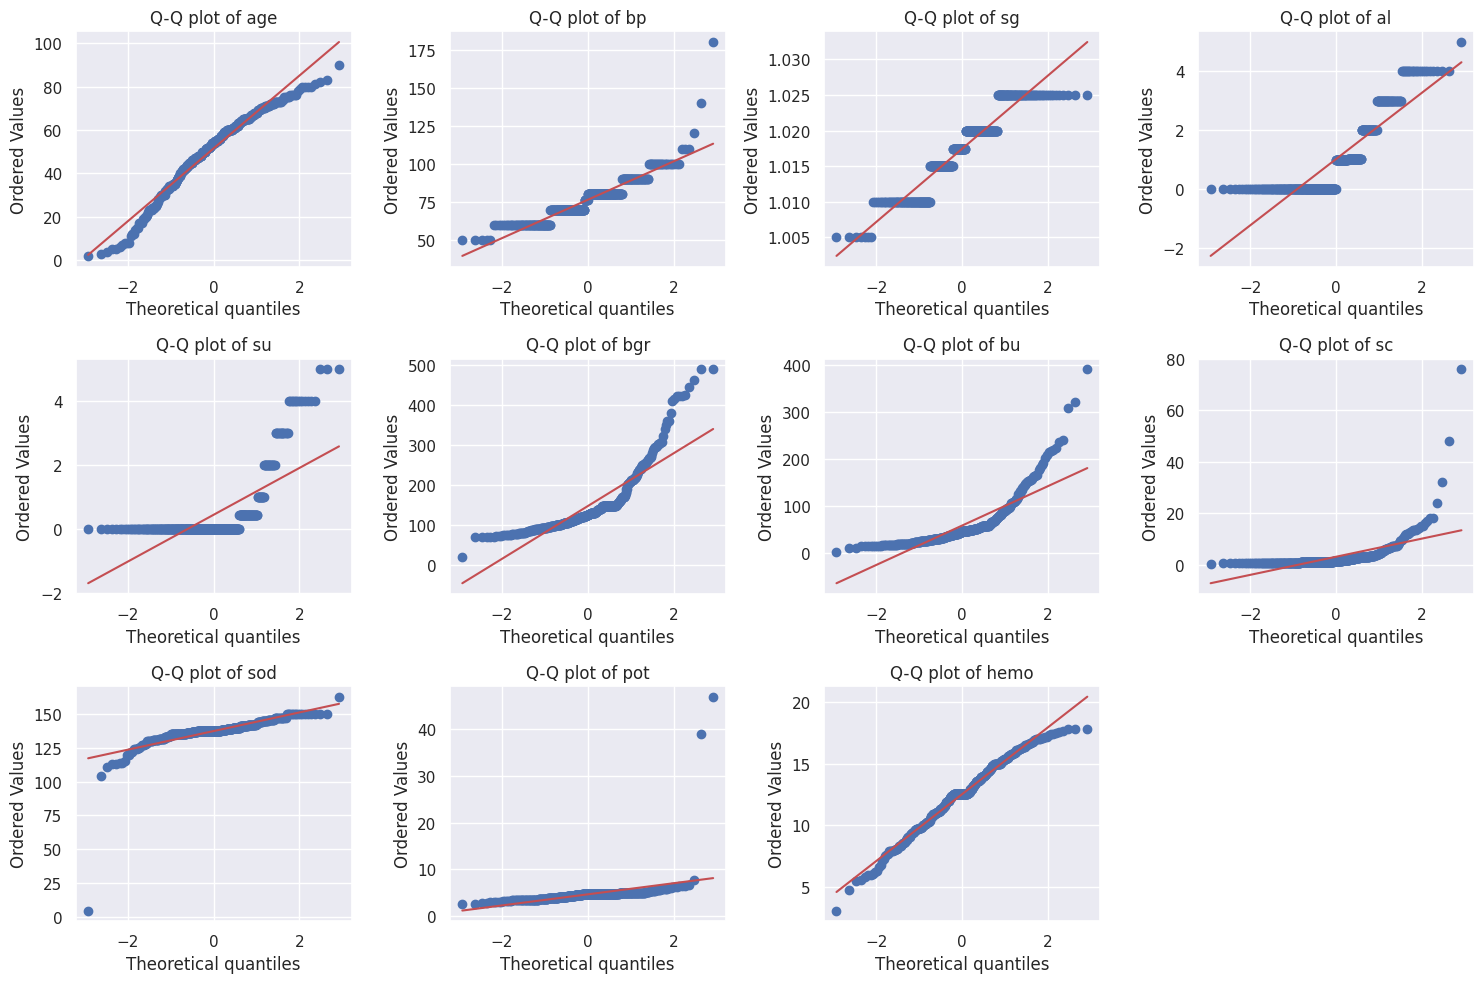

In [ ]:
import scipy.stats as stats

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns[:12]):  # Limit to the first 12 numerical columns
    plt.subplot(3, 4, i+1)
    stats.probplot(df[column], dist="norm", plot=plt)
    plt.title('Q-Q plot of ' + column)

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Make a copy of the DataFrame for correlation analysis
df_copy = df.copy()

# Start by creating a label encoder object
le = LabelEncoder()

# Loop over all categorical columns (not including the target 'classification')
# and apply label encoding only for correlation purposes
for col in df_copy.select_dtypes(include=['object']).columns:
    df_copy[col] = le.fit_transform(df_copy[col])

# Compute the correlation matrix with label encoded data
correlation_matrix = df_copy.corr()

# Extract the correlations of all features with the target variable 'classification'
correlations_with_target = correlation_matrix['classification'].sort_values(ascending=False)

# Display the correlations with the target variable
print(correlations_with_target)

classification    1.000000
hemo              0.727919
sg                0.696329
pcv               0.648461
rc                0.451092
pc                0.371574
sod               0.341609
rbc               0.284911
pot              -0.077259
wc               -0.092365
ba               -0.188370
cad              -0.216040
age              -0.220519
pcc              -0.259008
bp               -0.293477
sc               -0.294958
ane              -0.320766
su               -0.329386
bu               -0.374260
pe               -0.378165
appet            -0.383689
dm               -0.395778
bgr              -0.400775
htn              -0.584451
al               -0.598047
Name: classification, dtype: float64


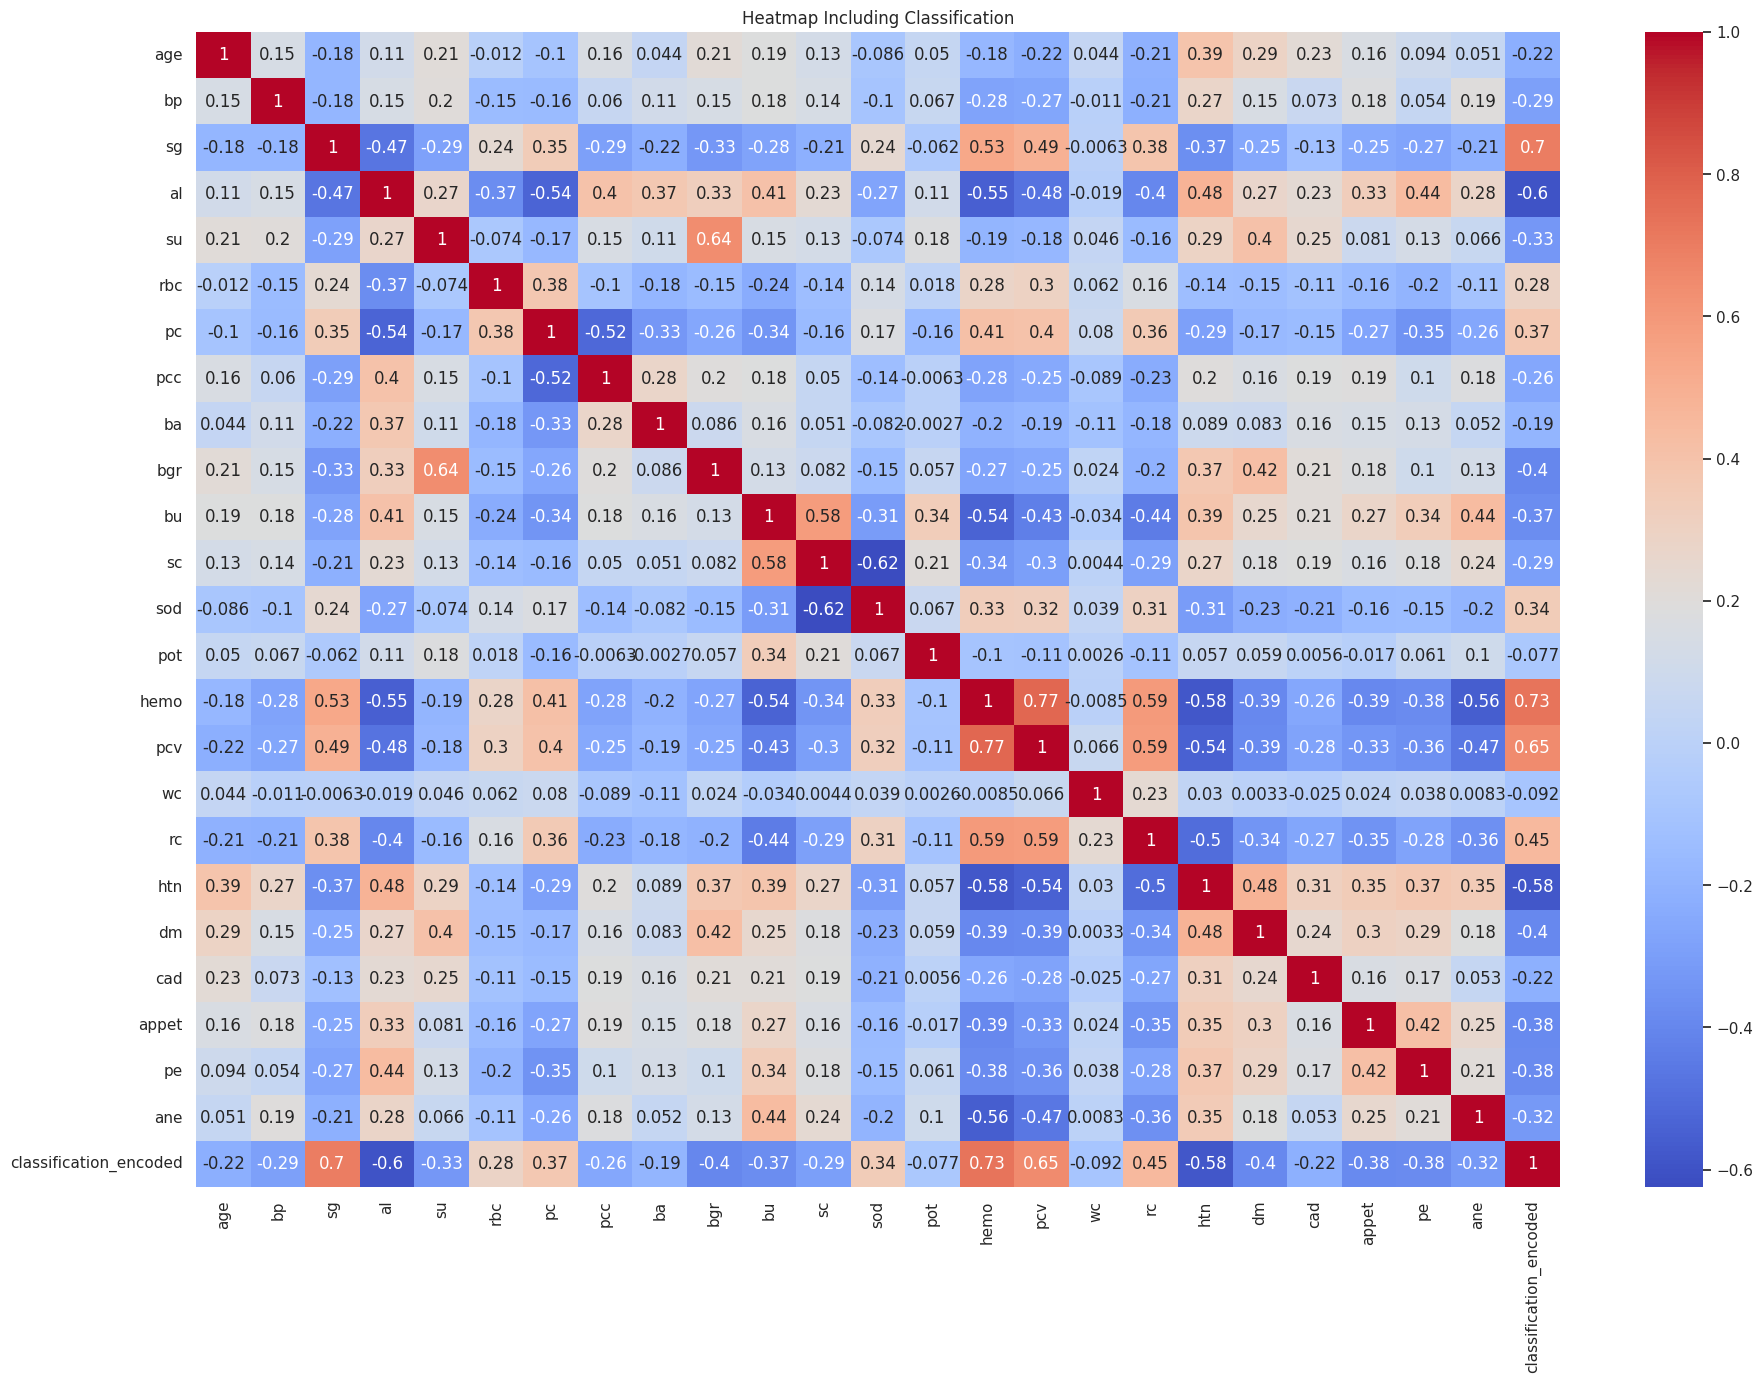

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and 'classification' is the target variable.
# If 'classification' is categorical, convert it to numerical using label encoding.

# We are reusing the 'label_encoder' that you have previously defined
# and assuming 'classification' is within your DataFrame 'df'.
df_copy['classification_encoded'] = label_encoder.fit_transform(df['classification'])

df_copy = df_copy.drop('classification', axis=1)

# Now you can calculate the correlation matrix without the original 'classification' column
correlation_matrix = df_copy.corr()

# Then create your heatmap
plt.figure(figsize=(22, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap Including Classification')
plt.show()



In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Start by creating a label encoder object
le = LabelEncoder()

# Loop over all categorical columns (not including the target 'classification')
# and apply label encoding to columns with only 2 categories
# and one-hot encoding to columns with more than 2 categories.
# Collect the new one-hot encoded columns in a new DataFrame.
one_hot_encoded_frames = []

categorical_columns = df.select_dtypes(include=['object']).columns.drop('classification')  # Exclude the target

for col in categorical_columns:
    num_unique_values = len(df[col].unique())
    if num_unique_values == 2:
        # Apply label encoder and replace the column in the original dataframe
        df[col] = le.fit_transform(df[col])
    else:
        # Apply one-hot encoder
        one_hot_encoded_frame = pd.get_dummies(df[col], prefix=col)
        one_hot_encoded_frames.append(one_hot_encoded_frame)

# Now concatenate the one-hot encoded columns with the original dataframe
df2 = pd.concat([df] + one_hot_encoded_frames, axis=1)

# Drop the original non-binary categorical columns as they are now one-hot encoded
df2.drop(categorical_columns, axis=1, inplace=True)

# Your df should now have all numeric columns, you can safely apply the scaler
from sklearn.preprocessing import StandardScaler

# Assume all columns now are either original numeric columns or encoded categorical columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df2.drop('classification', axis=1))  # Exclude target variable for scaling

# Now we create a new DataFrame that will include the scaled features and the target
df_scaled = pd.DataFrame(df_scaled, columns=df2.columns.drop('classification'))

# Add the target variable back into the scaled DataFrame
df_scaled['classification'] = df2['classification']


In [ ]:
#4 Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
#4 Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LassoCV
from sklearn.impute import SimpleImputer

# Assuming 'df' is your DataFrame

# Encoding categorical columns
label_encoder = LabelEncoder()
categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Splitting the dataset into features (X) and target (y)
X = df2.drop(['classification'], axis=1)
y = df['classification']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RFE with logistic regression
logreg = LogisticRegression(max_iter=10000)
rfe = RFE(estimator=logreg, n_features_to_select=1, step=1)
rfe = rfe.fit(X_train, y_train)

# RFE Ranking
rfe_ranking = pd.DataFrame({'Feature': X_train.columns, 'Ranking': rfe.ranking_}).sort_values(by='Ranking')

# LassoCV for automatic alpha selection
lasso = LassoCV(cv=5, random_state=42, max_iter=10000)

# Fitting the Lasso model
lasso.fit(X_train, y_train)

# Extracting the coefficients
lasso_coefs = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': lasso.coef_})

# Non-zero coefficients indicate important features
important_features_lasso = lasso_coefs[lasso_coefs['Coefficient'] != 0].sort_values(by='Coefficient', ascending=False)

# Displaying the results
print("RFE Ranking:")
print(rfe_ranking)
print("\nImportant Features by Lasso Regression:")
print(important_features_lasso)


RFE Ranking:
      Feature  Ranking
196     dm_no        1
3          al        2
197    dm_yes        3
178    rc_5.2        4
151    rc_2.5        5
..        ...      ...
89   wc_19100      197
72   wc_12000      198
71   wc_11900      199
67   wc_11300      200
92    wc_2600      201

[201 rows x 2 columns]

Important Features by Lasso Regression:
     Feature  Coefficient
10      hemo     0.163467
196    dm_no     0.070553
8        sod     0.009027
6         bu     0.001072
5        bgr    -0.001954
0        age    -0.003510
1         bp    -0.006782
145  wc_9800    -0.044386
3         al    -0.178001
178   rc_5.2    -0.394218


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Training a Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Getting feature importance from the Random Forest model
rf_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf.feature_importances_}).sort_values(by='Importance', ascending=False)

# Display the feature importances
print("\nFeature Importance from Random Forest:")
print(rf_importances)



Feature Importance from Random Forest:
      Feature  Importance
2          sg    0.186786
10       hemo    0.150051
3          al    0.086092
7          sc    0.084918
197    dm_yes    0.057295
..        ...         ...
19     pcv_20    0.000000
18     pcv_19    0.000000
94    wc_3800    0.000000
92    wc_2600    0.000000
69   wc_11500    0.000000

[201 rows x 2 columns]


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Encoding categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns

# Label encoding for categorical variables
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Assuming 'id' is just an identifier and should be excluded from the predictors
# Ensure 'id' column exists before dropping it
if 'id' in df.columns:
    X = df.drop(['id', 'classification'], axis=1)
else:
    X = df.drop(['classification'], axis=1)
y = df['classification']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head()


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
3,48.0,70.0,1.005000,4.000000,0.000000,1,0,1,0,117.0,...,11.2,20,62,18,1,3,1,1,1,1
18,60.0,100.0,1.025000,0.000000,3.000000,1,1,0,0,263.0,...,12.7,25,13,22,1,4,2,0,0,0
202,78.0,60.0,1.017408,1.016949,0.450142,1,1,0,0,114.0,...,8.0,12,90,31,0,4,1,0,0,1
250,40.0,80.0,1.025000,0.000000,0.000000,1,1,0,0,140.0,...,15.0,36,5,24,0,3,1,0,0,0
274,19.0,80.0,1.020000,0.000000,0.000000,1,1,0,0,107.0,...,14.4,32,90,31,0,3,1,0,0,0


In [ ]:
#6 Do the training and test sets have the same data?
import pandas as pd
from sklearn.model_selection import train_test_split


X = df.drop(columns=['classification'])
y = df['classification']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


train_test_overlap = pd.merge(X_train, X_test, how='inner')

overlap_exists = not train_test_overlap.empty
print("Is there any overlap between training and test sets?",overlap_exists)

Is there any overlap between training and test sets? False


              age          bp          sg          al          su    rbc  \
count  164.000000  164.000000  164.000000  164.000000  164.000000  164.0   
mean    47.603456   71.847184    1.021017    0.159260    0.025311    1.0   
std     16.415330    8.730496    0.004072    0.508092    0.119131    0.0   
min     11.000000   60.000000    1.010000    0.000000    0.000000    1.0   
25%     34.750000   60.000000    1.020000    0.000000    0.000000    1.0   
50%     47.500000   70.000000    1.020000    0.000000    0.000000    1.0   
75%     60.000000   80.000000    1.025000    0.000000    0.000000    1.0   
max     90.000000   90.000000    1.025000    3.000000    1.000000    1.0   

          pc    pcc     ba         bgr  ...         pcv          wc  \
count  164.0  164.0  164.0  164.000000  ...  164.000000  164.000000   
mean     1.0    0.0    0.0  111.940806  ...   32.920732   62.182927   
std      0.0    0.0    0.0   21.971603  ...    5.192000   25.077856   
min      1.0    0.0    0.0   70

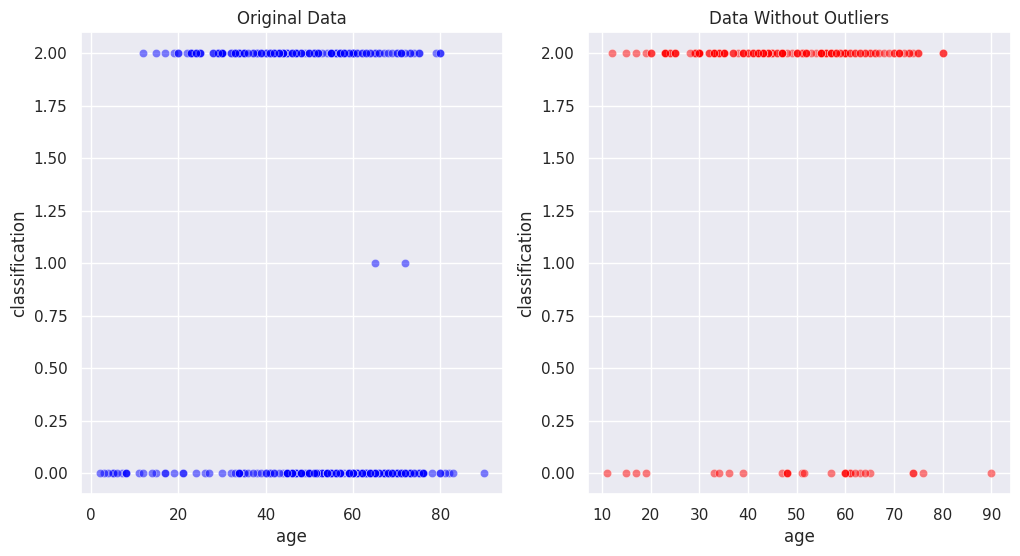

In [ ]:
#11
import pandas as pd


a_data = df.copy()

def remove_outliers(data1):
    Q1 = data1.quantile(0.25)
    Q3 = data1.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[((df < lower_bound) | (df > upper_bound)).any(axis=1)]

    data1_clean = df.drop(outliers.index, axis=0)

    return data1_clean

data1_clean = remove_outliers(a_data.select_dtypes(include=['float64', 'int64']))

data1_clean = data1_clean.merge(a_data.drop(columns=a_data.select_dtypes(include=['float64', 'int64']).columns), left_index=True, right_index=True, how='left')

print(data1_clean.describe())
df.describe

import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.scatterplot(data=df, x='age', y='classification', color='blue', alpha=0.5)
plt.title('Original Data')

plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.scatterplot(data= data1_clean, x='age', y='classification', color='red', alpha=0.5)
plt.title('Data Without Outliers')

plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.metrics import mean_squared_error

# Choose only numeric columns for simplicity in calculating errors
data_numeric = df.select_dtypes(include=[np.number])

X_train, X_test = train_test_split(data_numeric, test_size=0.2, random_state=42)

# Function to remove a random percentage of data
def remove_random_data(data1, percentage):
    df_copy = data1.copy()
    for column in df_copy.columns:
        num_missing = int(df_copy[column].shape[0] * percentage)
        missing_indices = np.random.choice(df_copy[column].shape[0], num_missing, replace=False)
        df_copy.iloc[missing_indices, df_copy.columns.get_loc(column)] = np.nan
    return df_copy

# Function to evaluate imputation
def evaluate_imputation(original_data, imputed_data):
    original_data_nonan = np.nan_to_num(original_data)
    mse = mean_squared_error(original_data_nonan, imputed_data)
    return np.sqrt(mse)  # Return RMSE for easier interpretation

# Imputation methods
imputers = {
    'mean': SimpleImputer(strategy='mean'),
    'median': SimpleImputer(strategy='median'),
    'knn': KNNImputer(n_neighbors=5)
}

# Percentages of data to remove
percentages = [0.01, 0.05, 0.10]

# Store results
results = {}

for percentage in percentages:
    X_train_missing = remove_random_data(X_train, percentage)
    results[percentage] = {}

    for name, imputer in imputers.items():
        imputed = imputer.fit_transform(X_train_missing)
        rmse = evaluate_imputation(X_train_missing, imputed)
        results[percentage][name] = rmse

# Display the results
for percentage, methods in results.items():
    print(f"\nPercentage of data removed: {percentage * 100}%")
    for method, rmse in methods.items():
        print(f"Imputation Method: {method}, RMSE: {rmse}")



Percentage of data removed: 1.0%
Imputation Method: mean, RMSE: 4.693445897829937
Imputation Method: median, RMSE: 4.457255123393726
Imputation Method: knn, RMSE: 4.530248122315945

Percentage of data removed: 5.0%
Imputation Method: mean, RMSE: 10.853571081106058
Imputation Method: median, RMSE: 10.325500016307748
Imputation Method: knn, RMSE: 10.674595502183328

Percentage of data removed: 10.0%
Imputation Method: mean, RMSE: 15.339694692134536
Imputation Method: median, RMSE: 14.525422581582355
Imputation Method: knn, RMSE: 15.744244723910407


In [ ]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install h2o

In [ ]:
# Importing all the libararies required for the assignment
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from scipy.stats import pearsonr
#sns.set(rc={"figure.figsize": (16, 8)})

In [ ]:
 #Setting up maximum runtime for the AutoML
min_mem_size = 6
run_time = 222

In [ ]:
pct_memory = 0.5
virtual_memory = psutil.virtual_memory()
min_mem_size = int(round(int(pct_memory * virtual_memory.available) / 1073741824, 0))
print(min_mem_size)

4


In [ ]:
# 65535 Highest port no
# Start the H2O server on a random port
port_no = random.randint(5555, 55555)
#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
    h2o.init(
        strict_version_check=False, min_mem_size_GB=min_mem_size, port=port_no
    )  # start h2o
except:
    logging.critical("h2o.init")
    h2o.download_all_logs(dirname=logs_path, filename=logfile)
    h2o.cluster().shutdown()
    sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:25146..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmplobpockh
  JVM stdout: /tmp/tmplobpockh/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmplobpockh/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:25146
Connecting to H2O server at http://127.0.0.1:25146 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,20 days
H2O_cluster_name:,H2O_from_python_unknownUser_4micve
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,4 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
!pip3 install h2o

In [ ]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install h2o

In [ ]:
import h2o
from h2o.automl import H2OAutoML

# Initialize the H2O cluster
h2o.init()

# Assuming 'df' is your Pandas DataFrame with the actual data
# Convert the pandas DataFrame to an H2OFrame
h2o_df = h2o.H2OFrame(df)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,59 mins 11 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,20 days
H2O_cluster_name:,H2O_from_python_unknownUser_ibyqpo
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.048 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
pct_rows = 0.80  # Setting up the data split between training and test dataset.
df1_train, df1_test = h2o_df.split_frame([pct_rows])

In [ ]:
print(df1_train.shape)
print(df1_test.shape)

(330, 25)
(70, 25)


In [ ]:
df1_train.head()

age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
48,80,1.02,1,0,1,1,0,0,121,36,1.2,137.529,4.62724,15.4,32,72,31,1,4,1,0,0,0,0
7,50,1.02,4,0,1,1,0,0,148.037,18,0.8,137.529,4.62724,11.3,26,56,31,0,3,1,0,0,0,0
62,80,1.01,2,3,1,1,0,0,423,53,1.8,137.529,4.62724,9.6,19,70,31,0,4,1,1,0,1,0
48,70,1.005,4,0,1,0,1,0,117,56,3.8,111,2.5,11.2,20,62,18,1,3,1,1,1,1,0
60,90,1.015,3,0,1,1,0,0,74,25,1.1,142,3.2,12.2,27,72,23,1,4,1,0,1,0,0
68,70,1.01,0,0,1,1,0,0,100,54,24,104,4,12.4,24,90,31,0,3,1,0,0,0,0
24,76.4691,1.015,2,4,1,0,0,0,410,31,1.1,137.529,4.62724,12.4,32,64,29,0,4,1,0,1,0,0
52,100,1.015,3,0,1,0,1,0,138,60,1.9,137.529,4.62724,10.8,21,88,19,1,4,1,0,0,1,0
53,90,1.02,2,0,0,0,1,0,70,107,7.2,114,3.7,9.5,17,18,16,1,4,1,1,0,1,0
50,60,1.01,2,4,1,0,1,0,490,55,4,137.529,4.62724,9.4,16,90,31,1,4,1,0,0,1,0


In [ ]:
# Assuming h2o_df is your H2O DataFrame and 'classification' is the name of your target variable
X = [col for col in h2o_df.columns if col != 'classification']
print(X)


['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']


In [ ]:
# Set target and predictor variables
y = "classification"

In [ ]:
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)  # Setting of AutoML

In [ ]:
aml.train(x=X, y=y, training_frame=df1_train)  # Trainig the dataset on different models

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),3/6
# GBM base models (used / total),1/1
# XGBoost base models (used / total),1/1
# DRF base models (used / total),0/2
# DeepLearning base models (used / total),1/1
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


In [ ]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_BestOfFamily_4_AutoML_3_20240402_231355,0.220104,0.0484459,0.114986,0.143849,0.0484459
GBM_grid_1_AutoML_3_20240402_231355_model_45,0.224883,0.0505725,0.120325,0.143672,0.0505725
GBM_grid_1_AutoML_3_20240402_231355_model_8,0.236967,0.0561536,0.103634,0.151505,0.0561536
XGBoost_grid_1_AutoML_3_20240402_231355_model_40,0.237638,0.0564716,0.0916535,0.150654,0.0564716
GBM_grid_1_AutoML_3_20240402_231355_model_40,0.244895,0.0599737,0.100187,0.155612,0.0599737
XGBoost_grid_1_AutoML_3_20240402_231355_model_34,0.245623,0.0603309,0.116631,0.156813,0.0603309
GBM_grid_1_AutoML_3_20240402_231355_model_13,0.251919,0.0634632,0.107156,0.167023,0.0634632
GBM_grid_1_AutoML_3_20240402_231355_model_53,0.252643,0.0638287,0.111998,0.159594,0.0638287
StackedEnsemble_AllModels_2_AutoML_3_20240402_231355,0.252957,0.0639872,0.133584,0.162942,0.0639872
StackedEnsemble_BestOfFamily_3_AutoML_3_20240402_231355,0.254278,0.0646572,0.130586,0.16367,0.0646572


In [ ]:
best_model = aml.get_best_model()
print(best_model)

Model Details
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_4_AutoML_3_20240402_231355


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       3/6
# GBM base models (used / total)           1/1
# XGBoost base models (used / total)       1/1
# DRF base models (used / total)           0/2
# DeepLearning base models (used / total)  1/1
# GLM base models (used / total)           0/1
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.002078079031571779
RMSE: 0.04558595212970525
MAE: 0.04065469666837649
RMSLE: 0.0370541

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


GLM model index: 123
GLM model algorithm: glm


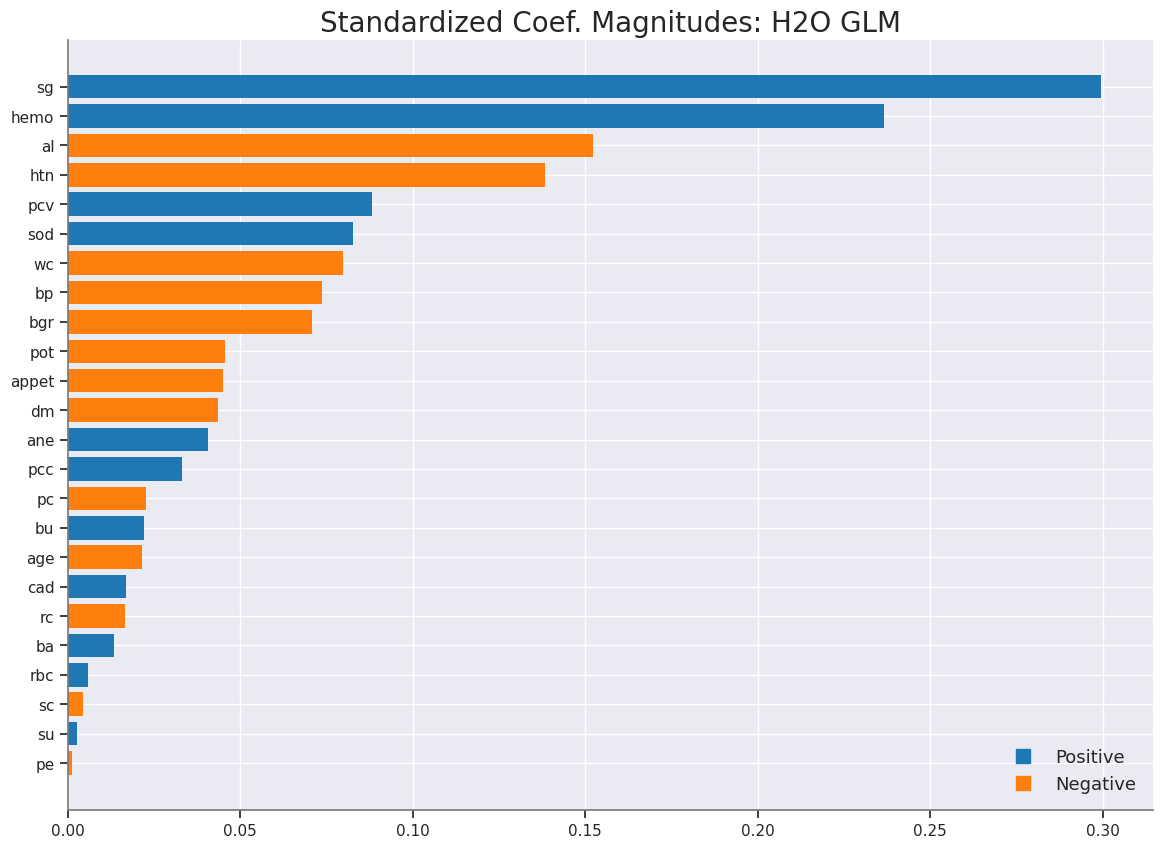

In [ ]:
model_ids = list(lb['model_id'].as_data_frame().iloc[:,0])
glm_index = next((index for index, model_id in enumerate(model_ids) if "GLM" in model_id), None)

# If a GLM model is found in the leaderboard
if glm_index is not None:
    print("GLM model index:", glm_index)
    glm_model = h2o.get_model(model_ids[glm_index])
    print("GLM model algorithm:", glm_model.algo)

    # Plotting the standardized coefficients for the GLM model
    glm_model.std_coef_plot()
else:
    print("No GLM model found in the leaderboard.")

In [ ]:
print(best_model.rmse(train=True))

0.04558595212970525


In [ ]:
predictions = best_model.predict(df1_test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [ ]:
y_pred = h2o.as_list(
    predictions
)  # Predictions on Test Dataset using the best model from the leaderboard.
print(y_pred)

     predict
0   0.006770
1  -0.019020
2  -0.022912
3   0.017132
4   0.002789
..       ...
65  2.051648
66  2.047752
67  2.092485
68  2.056785
69  2.056857

[70 rows x 1 columns]


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [ ]:
y_test = h2o.as_list(df1_test[y])  # Real Answers
y_test

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


,classification
0,0
1,0
2,0
3,0
4,0
...,...
65,2
66,2
67,2
68,2


In [ ]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

kidney_glm = H2OGeneralizedLinearEstimator(
    family="gaussian", lambda_=0, compute_p_values=True, nfolds=5
)  # Elastic Net Regularization
kidney_glm_regularization_ridge = H2OGeneralizedLinearEstimator(
    family="gaussian", alpha=0, nfolds=5
)  # RIDGE Regularization
kidney_glm_regularization_lasso = H2OGeneralizedLinearEstimator(
    family="gaussian", alpha=1, nfolds=5
)  # LASSO Regularization
kidney_glm_regularization_lamba_search = H2OGeneralizedLinearEstimator(
    lambda_search=True
)  # Lambda Search

In [ ]:
glm_model.train(x=X, y=y, training_frame=df1_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1712095795690_75


GLM Model: summary
    family    link      regularization                               number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  -------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Elastic Net (alpha = 0.5, lambda = 0.1418 )  24                            11                             2                       py_25_sid_bfe5

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.24677692595716028
RMSE: 0.49676647024246745
MAE: 0.4273108257819276
RMSLE: 0.39000165072980275
Mean Residual Deviance: 0.24677692595716028
R^2: 0.7361154041954561
Null degrees of freedom: 329
Residual degrees of freedom: 318
Null deviance: 308.60606060606045
Residual deviance: 81.43638556586289
AIC: 500.74017212846957

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective           training_rmse        training_deviance    training_mae        training_r2
--  -------------------  ----------  ------------  -------------------------  ------------------  -------------------  -------------------  ------------------  ------------------
    2024-04-02 23:23:55  0.000 sec   0             308.60606060606045         0.9351698806244256
    2024-04-02 23:23:55  0.080 sec   2                                                            0.49676647024246745  0.24677692595716028  0.4273108257819276  0.7361154041954561

Variable Importances: 
variable    relative_importance    scaled_importance    percentage
----------  ---------------------  -------------------  --------------------
sg          0.30346933007240295    1.0                  0.30807337903991777
hemo        0.24011483788490295    0.791232635692099    0.2437577116843252
htn         0.14493535459041595    0.47759473603423674  0.1471342241417449
al          0.11086464673280716    0.3653240566562579   0.11254661657866373
pcv         0.046514157205820084   0.15327465610683802  0.04721984122801496
bgr         0.03809148818254471    0.12552005889180526  0.03866938868008792
bp          0.027284622192382812   0.08990899405179804  0.02769856760361729
wc          0.026247888803482056   0.08649272332469224  0.02664610553700265
sod         0.025443026795983315   0.08384052118187038  0.02582903266096661
dm          0.019717160612344742   0.06497249856399176  0.020016297177275145
---         ---                    ---                  ---
pc          0.0                    0.0                  0.0
pcc         0.0                    0.0                  0.0
ba          0.0                    0.0                  0.0
bu          0.0                    0.0                  0.0
sc          0.0                    0.0                  0.0
pot         0.0                    0.0                  0.0
rc          0.0                    0.0                  0.0
cad         0.0                    0.0                  0.0
pe          0.0                    0.0                  0.0
ane         0.0                    0.0                  0.0
[24 rows x 4 columns]


[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [ ]:
kidney_glm_regularization_ridge.train(x=X, y=y, training_frame=df1_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
,gaussian,identity,Ridge ( lambda = 0.07091 ),24,24,1,py_25_sid_bfe5
,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
aic,145.42917,18.280853,133.07512,176.87976,145.82272,134.1174,137.25081
loglikelihood,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mae,0.4000745,0.0244695,0.3791442,0.415553,0.4196934,0.3681706,0.4178114
mean_residual_deviance,0.2408298,0.0290459,0.2120421,0.2789061,0.2536254,0.2112332,0.2483421
mse,0.2408298,0.0290459,0.2120421,0.2789061,0.2536254,0.2112332,0.2483421
null_deviance,62.417503,12.715096,55.37365,84.74112,58.233704,60.005653,53.73339
r2,0.7372094,0.0243387,0.7483268,0.7171606,0.718926,0.7746846,0.7269492
residual_deviance,16.014854,3.7030156,13.358654,22.312489,16.232023,13.518924,14.6521845


In [ ]:
kidney_glm_regularization_lasso.train(x=X, y=y, training_frame=df1_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
,gaussian,identity,Lasso (lambda = 0.07091 ),24,10,2,py_25_sid_bfe5
,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
aic,121.84839,13.840092,103.1973,130.64047,112.91399,137.7493,124.74088
loglikelihood,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mae,0.4433847,0.0300882,0.4104489,0.4857306,0.4603465,0.4375412,0.4228563
mean_residual_deviance,0.2718517,0.0348108,0.2216239,0.3036713,0.3038194,0.2551227,0.2750210
mse,0.2718517,0.0348108,0.2216239,0.3036713,0.3038194,0.2551227,0.2750210
null_deviance,61.93383,8.170717,60.087563,60.644886,52.40107,75.008,61.527634
r2,0.7073475,0.0416141,0.7706723,0.6693846,0.6853915,0.7278691,0.6834199
residual_deviance,17.870775,2.892537,13.519055,20.042305,16.406248,20.409813,18.976452


In [ ]:
lambda_search = kidney_glm_regularization_lamba_search.train(
    x=X, y=y, training_frame=df1_train
)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


In [ ]:
lambda_search

Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1712095795690_78


GLM Model: summary
    family    link      regularization                                lambda_search                                                                number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  --------------------------------------------  ---------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Elastic Net (alpha = 0.5, lambda = 0.01418 )  nlambda = 100, lambda.max = 1.4183, lambda.min = 0.01418, lambda.1se = -1.0  24                            20                             100                     py_25_sid_bfe5

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.21478566389535506
RMSE: 0.46344974257772015
MAE: 0.3744646485029839
RMSLE: NaN
Mean Residual Deviance: 0.21478566389535506
R^2: 0.7703244422800063
Null degrees of freedom: 329
Residual degrees of freedom: 309
Null deviance: 308.60606060606045
Residual deviance: 70.87926908546717
AIC: 472.92159404364355

Scoring History: 
     timestamp            duration    iteration    lambda    predictors    deviance_train       alpha    iterations    training_rmse        training_deviance    training_mae        training_r2
---  -------------------  ----------  -----------  --------  ------------  -------------------  -------  ------------  -------------------  -------------------  ------------------  ------------------
     2024-04-02 23:25:35  0.000 sec   1            .14E1     1             0.9351698806244262   0.5
     2024-04-02 23:25:35  0.001 sec   2            .14E1     3             0.9073057351872995   0.5
     2024-04-02 23:25:35  0.002 sec   3            .13E1     3             0.8691540835770748   0.5
     2024-04-02 23:25:35  0.003 sec   4            .12E1     3             0.8329297986783517   0.5
     2024-04-02 23:25:35  0.004 sec   5            .12E1     3             0.7985828416295062   0.5
     2024-04-02 23:25:35  0.004 sec   6            .11E1     3             0.7660585496363953   0.5
     2024-04-02 23:25:35  0.005 sec   7            .11E1     3             0.7352996848792168   0.5
     2024-04-02 23:25:35  0.005 sec   8            .1E1      4             0.7054857028413437   0.5
     2024-04-02 23:25:35  0.006 sec   9            .98E0     5             0.6758587676172743   0.5
     2024-04-02 23:25:35  0.006 sec   10           .93E0     5             0.645123401351276    0.5
---  ---                  ---         ---          ---       ---           ---                  ---      ---           ---                  ---                  ---                 ---
     2024-04-02 23:25:35  0.053 sec   91           .22E-1    21            0.2167162775393663   0.5
     2024-04-02 23:25:35  0.054 sec   92           .21E-1    21            0.21641860166779142  0.5
     2024-04-02 23:25:35  0.055 sec   93           .2E-1     21            0.21614347762827898  0.5
     2024-04-02 23:25:35  0.056 sec   94           .19E-1    21            0.2158929029172789   0.5
     2024-04-02 23:25:35  0.066 sec   95           .18E-1    21            0.21566396168279828  0.5
     2024-04-02 23:25:35  0.067 sec   96           .17E-1    21            0.21545499362136308  0.5
     2024-04-02 23:25:35  0.067 sec   97           .16E-1    21            0.2152641762915211   0.5
     2024-04-02 23:25:35  0.067 sec   98           .16E-1    21            0.2150902544712897   0.5
     2024-04-02 23:25:35  0.068 sec   99           .15E-1    21            0.21493094458732398  0.5
     2024-04-02 23:25:35  0.068 sec   100          .14E-1    21            0.21478566389535456  0.5      100           0.46344974257772015  0.21478566389535506  0.3744646485029839  0.7703244422800063
[100 rows x 13 columns]


Variab

In [ ]:
coeff_table = glm_model._model_json["output"]["coefficients_table"]

In [ ]:
coeff_table.as_data_frame()  # Z-Value and P-Value showing the significance of each attributes.

,names,coefficients,standardized_coefficients
0,Intercept,-57.606902,0.757576
1,age,0.000000,0.000000
2,bp,-0.001984,-0.027285
3,sg,56.162860,0.303469
4,al,-0.088447,-0.110865
5,su,0.000000,0.000000
6,rbc,0.000000,0.000000
7,pc,0.000000,0.000000
8,pcc,0.000000,0.000000
9,ba,0.000000,0.000000


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
XGBoost_grid_1_AutoML_3_20240402_231355_model_38,0.21202,0.0449526,0.115464,0.14793,0.0449526,305,0.015054,XGBoost
XGBoost_grid_1_AutoML_3_20240402_231355_model_2,0.214282,0.0459167,0.11853,0.156512,0.0459167,324,0.013377,XGBoost
XGBoost_grid_1_AutoML_3_20240402_231355_model_27,0.215071,0.0462556,0.117859,0.154308,0.0462556,239,0.01471,XGBoost
GBM_grid_1_AutoML_3_20240402_231355_model_21,0.217502,0.0473072,0.111912,0.165443,0.0473072,291,0.026533,GBM
XGBoost_grid_1_AutoML_3_20240402_231355_model_24,0.219892,0.0483524,0.126248,0.158804,0.0483524,290,0.018102,XGBoost
StackedEnsemble_AllModels_1_AutoML_3_20240402_231355,0.220242,0.0485067,0.125968,0.160589,0.0485067,117,0.128996,StackedEnsemble
StackedEnsemble_BestOfFamily_2_AutoML_3_20240402_231355,0.220242,0.0485067,0.125968,0.160589,0.0485067,119,0.066155,StackedEnsemble
GBM_grid_1_AutoML_3_20240402_231355_model_8,0.221133,0.0488996,0.113234,0.163668,0.0488996,562,0.029144,GBM
XGBoost_3_AutoML_3_20240402_231355,0.221685,0.0491442,0.114911,0.16295,0.0491442,248,0.010467,XGBoost
StackedEnsemble_BestOfFamily_4_AutoML_3_20240402_231355,0.224109,0.0502249,0.134477,0.162026,0.0502249,116,0.112951,StackedEnsemble


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

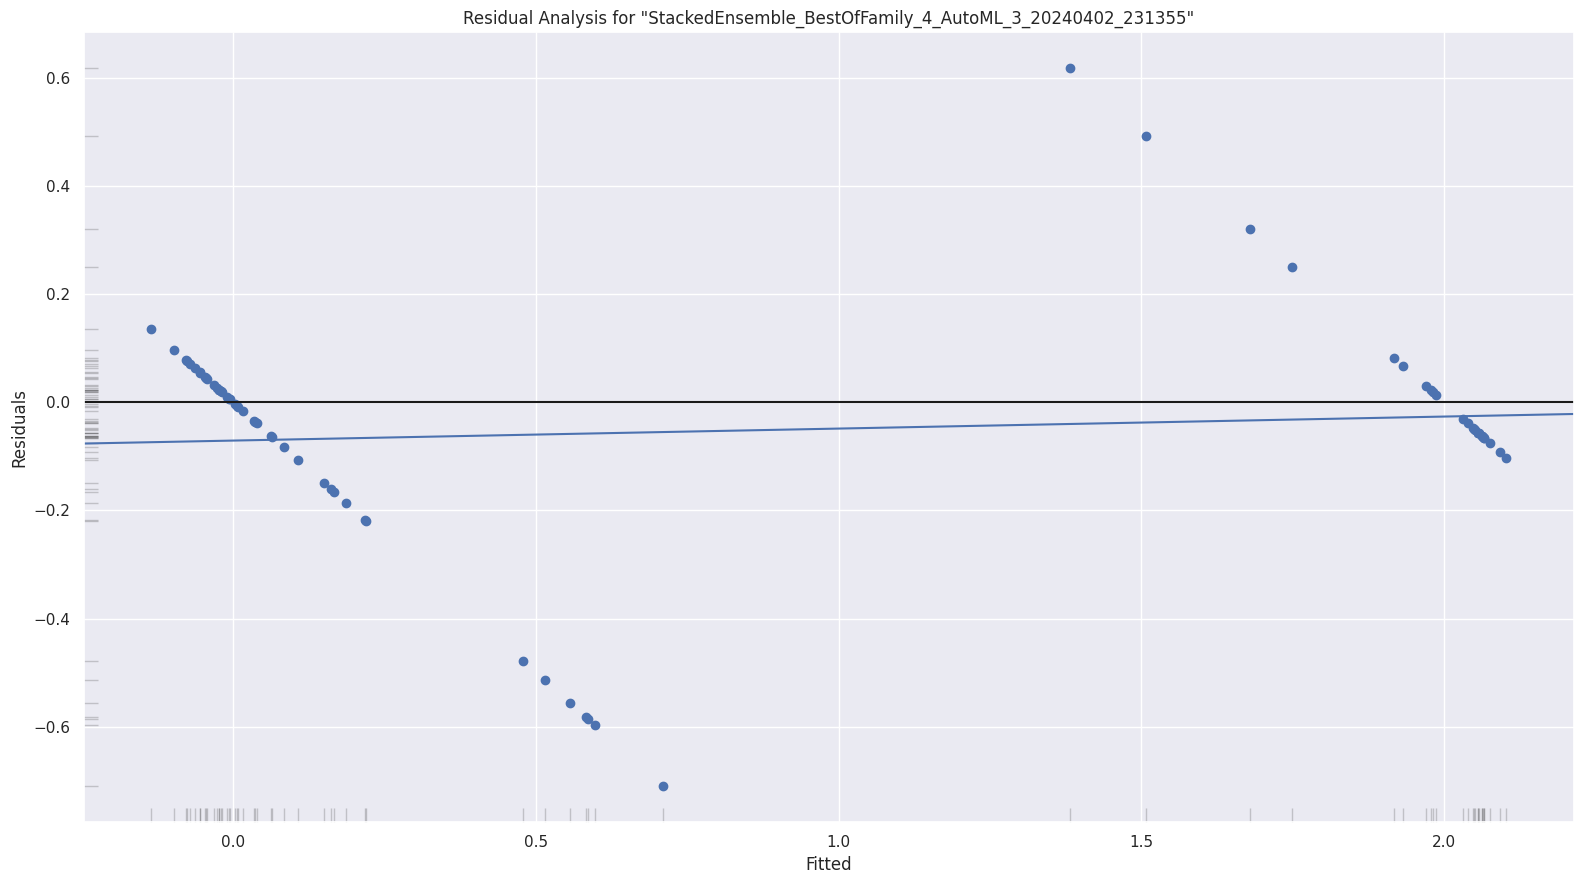

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

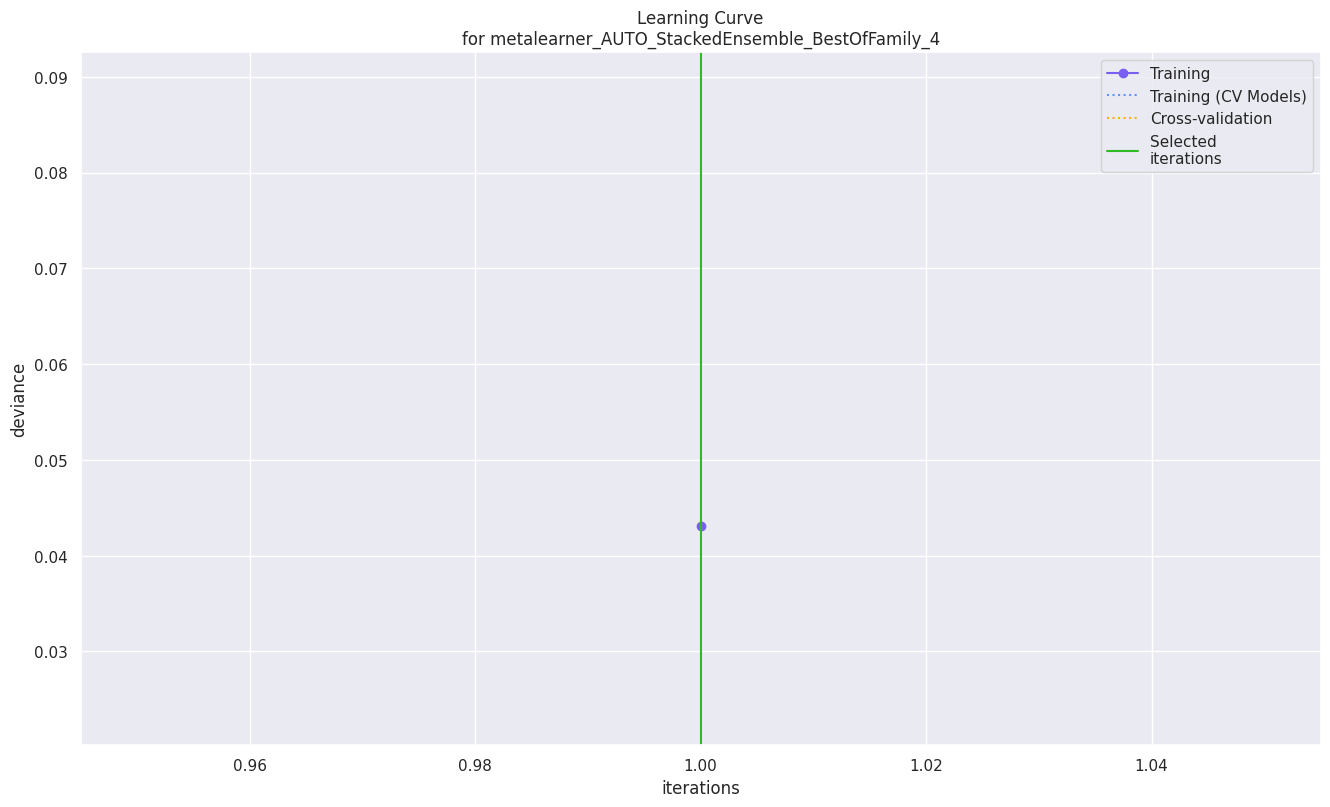

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

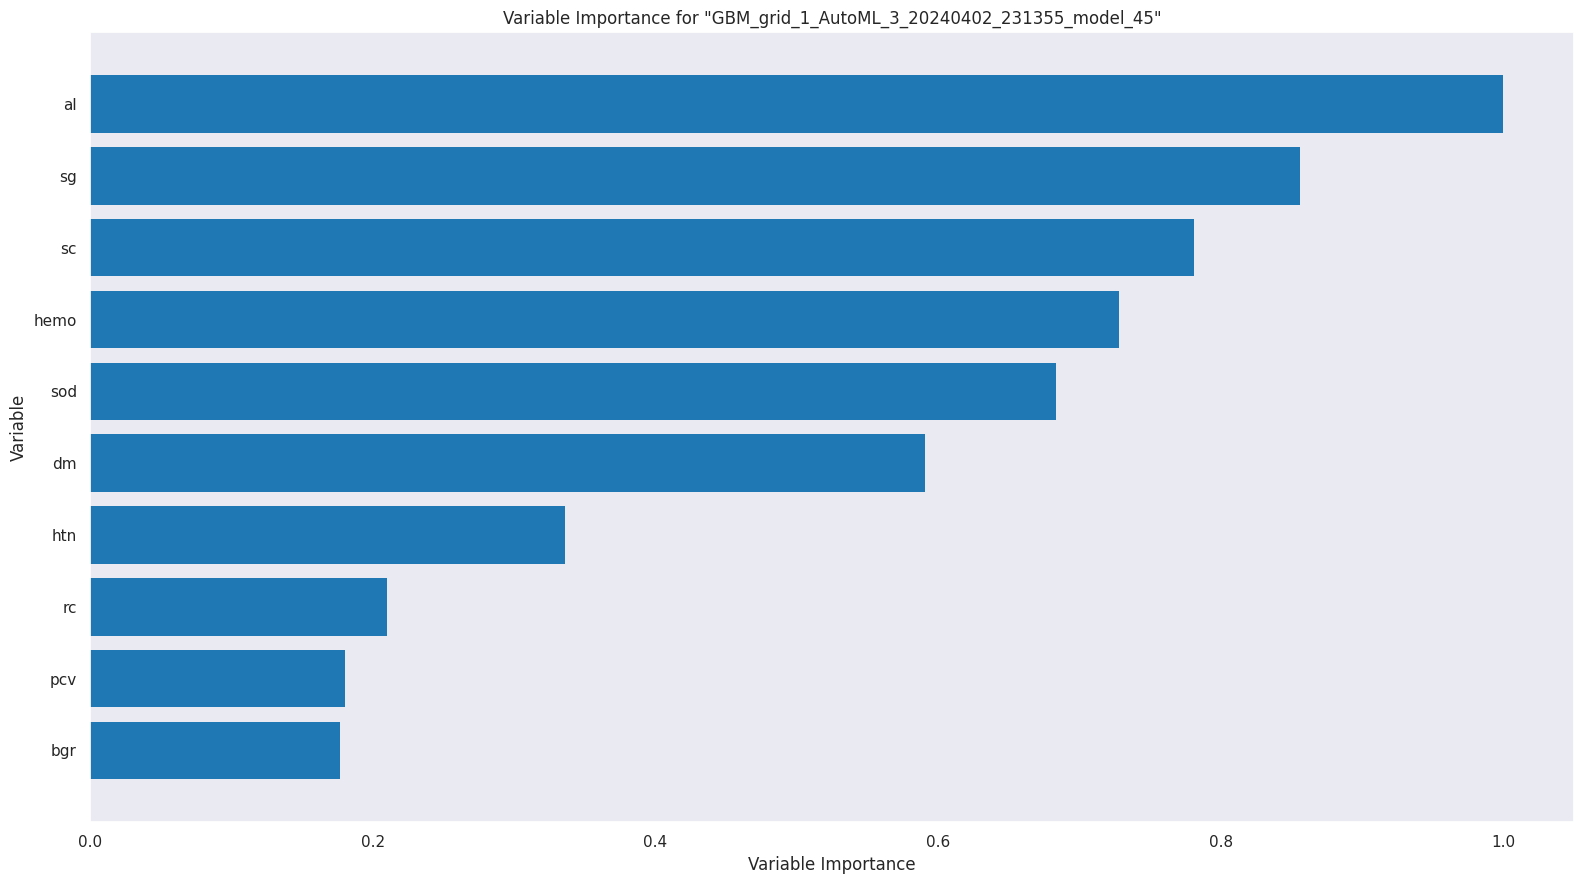

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

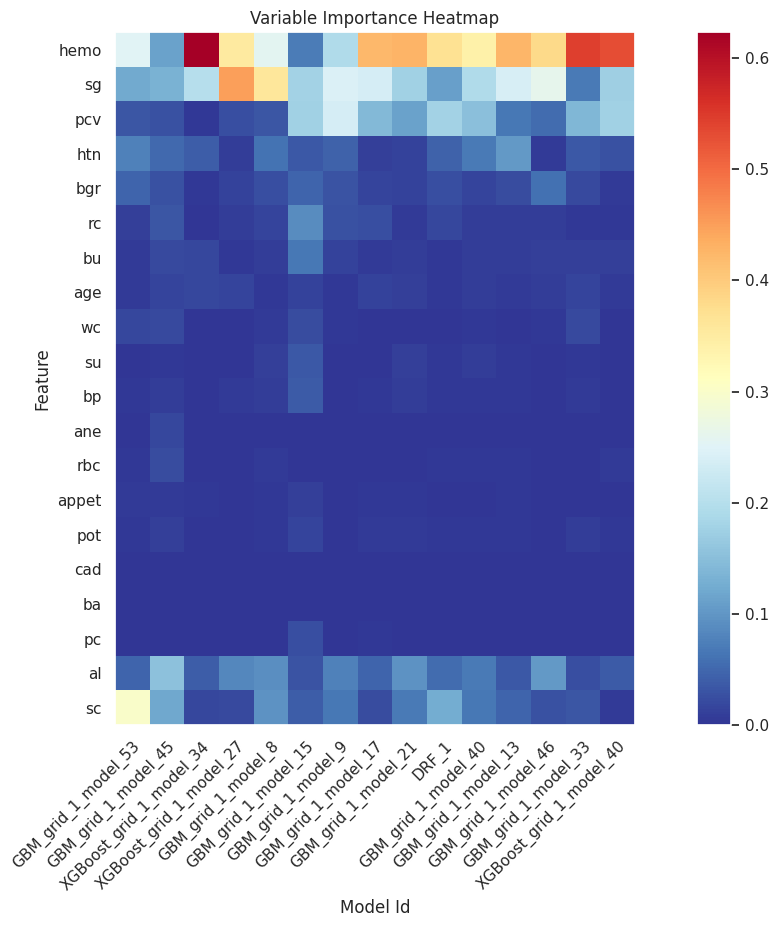

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

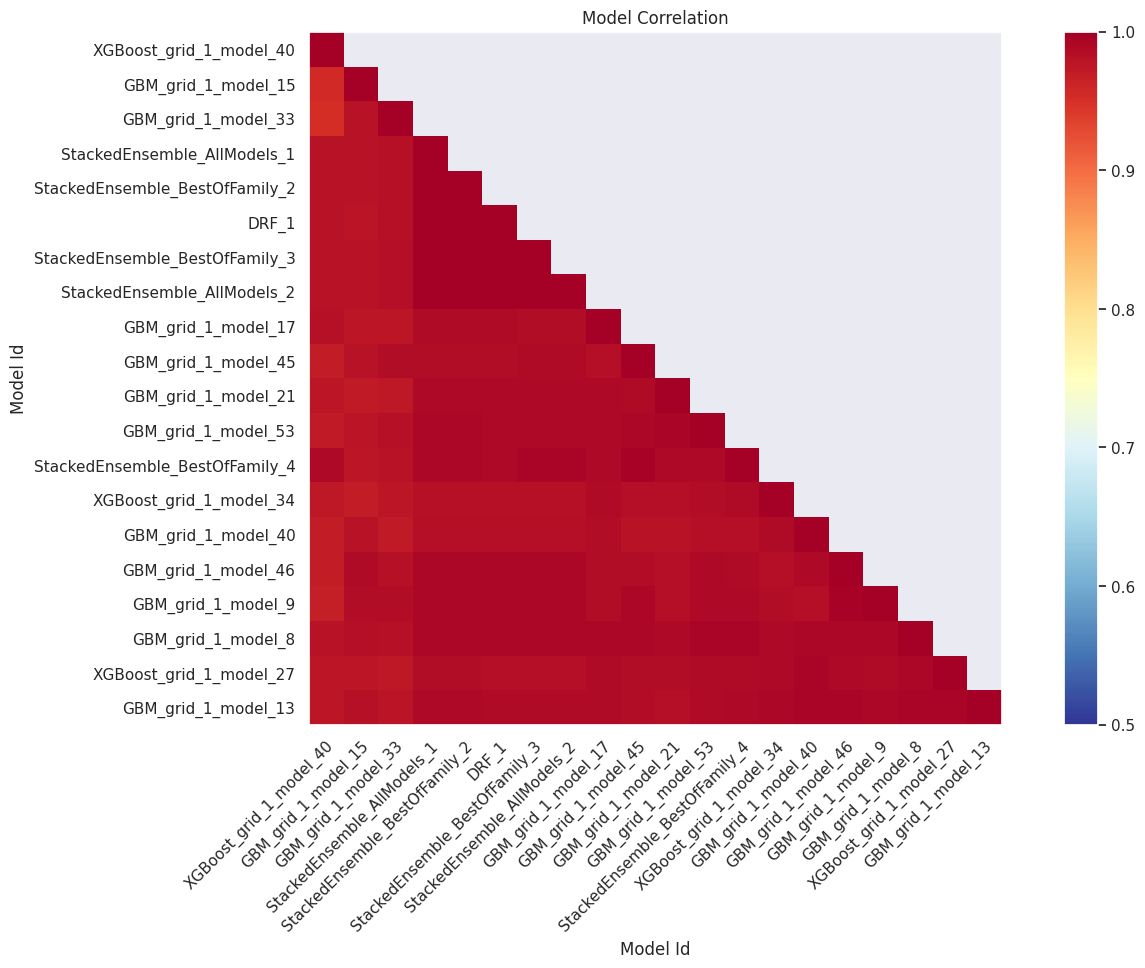

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

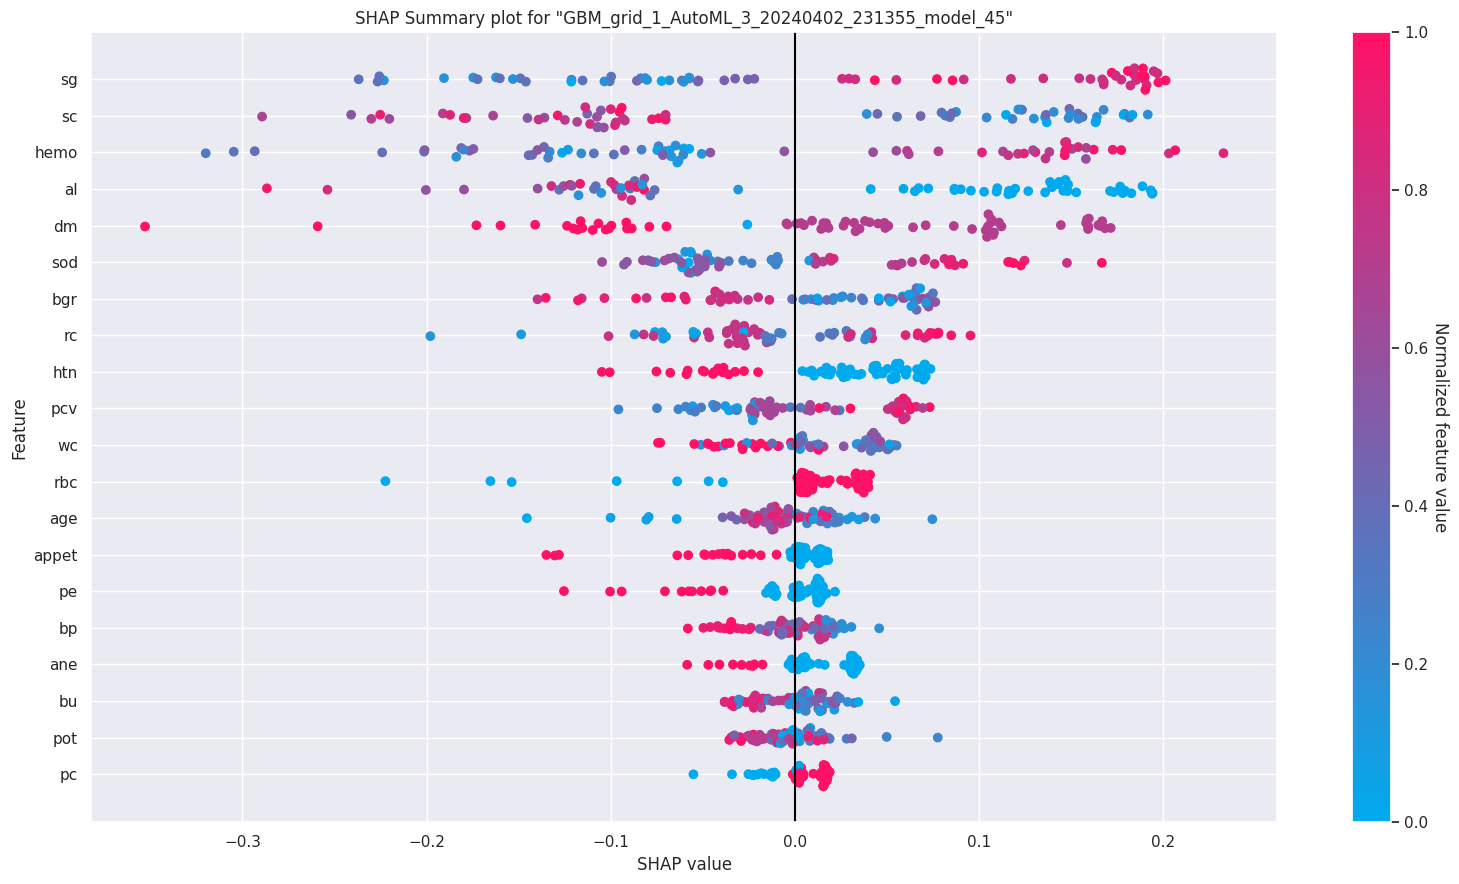

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

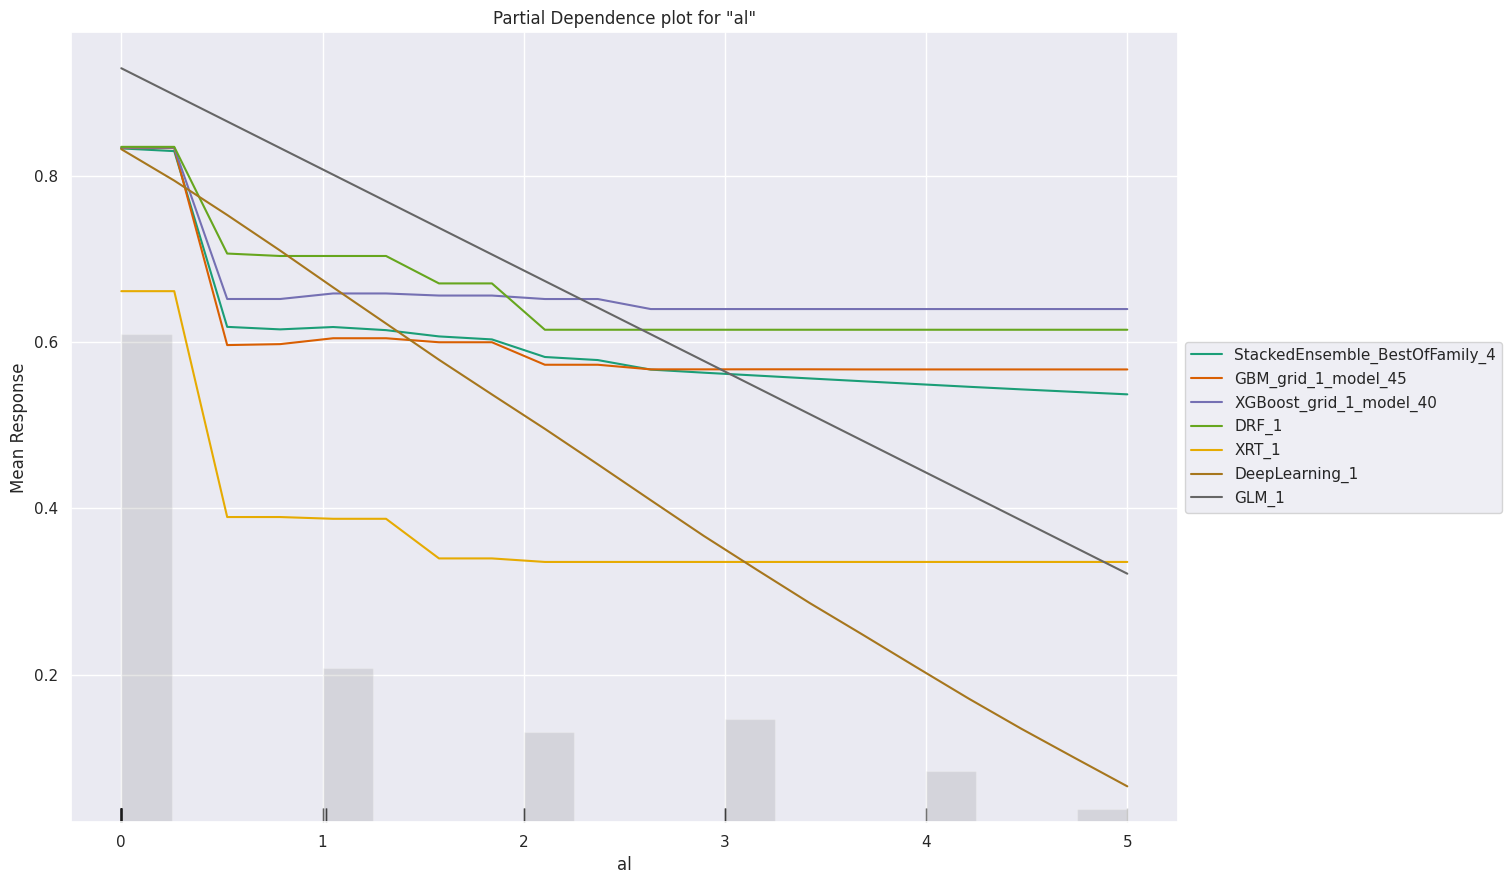

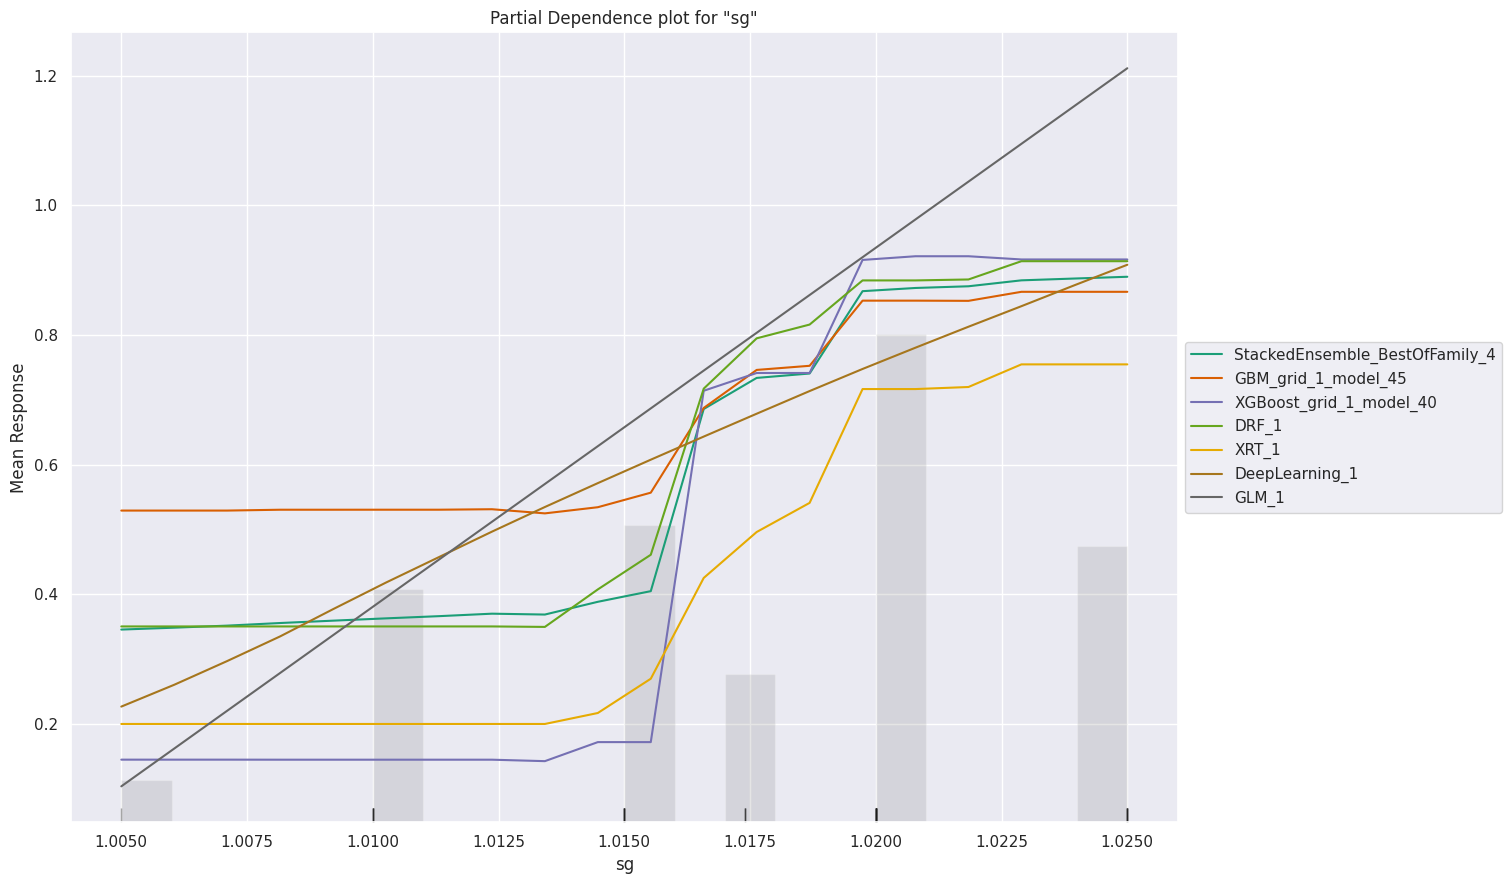

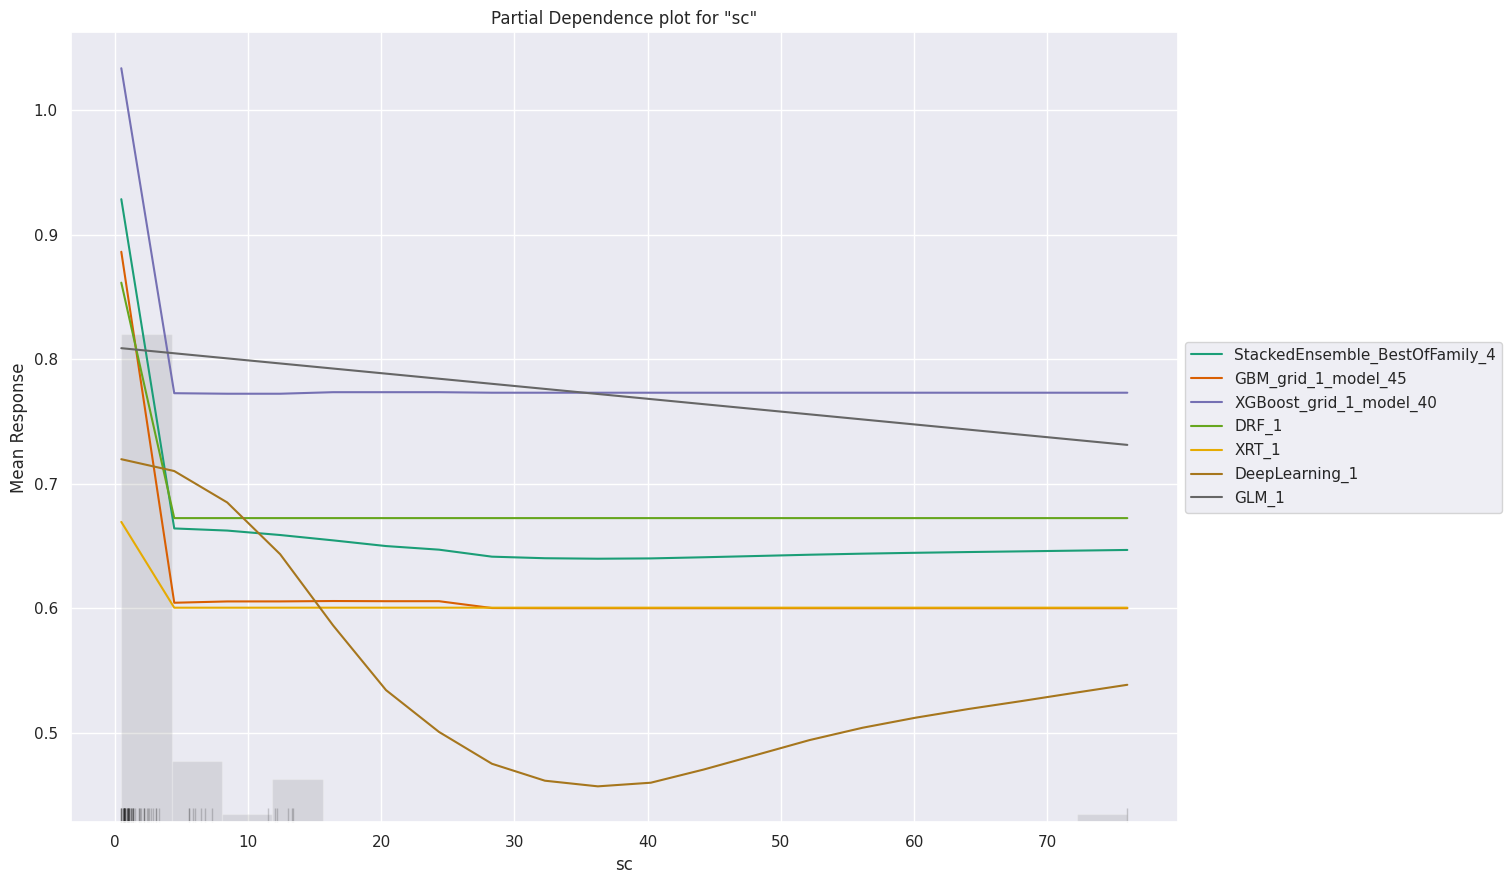

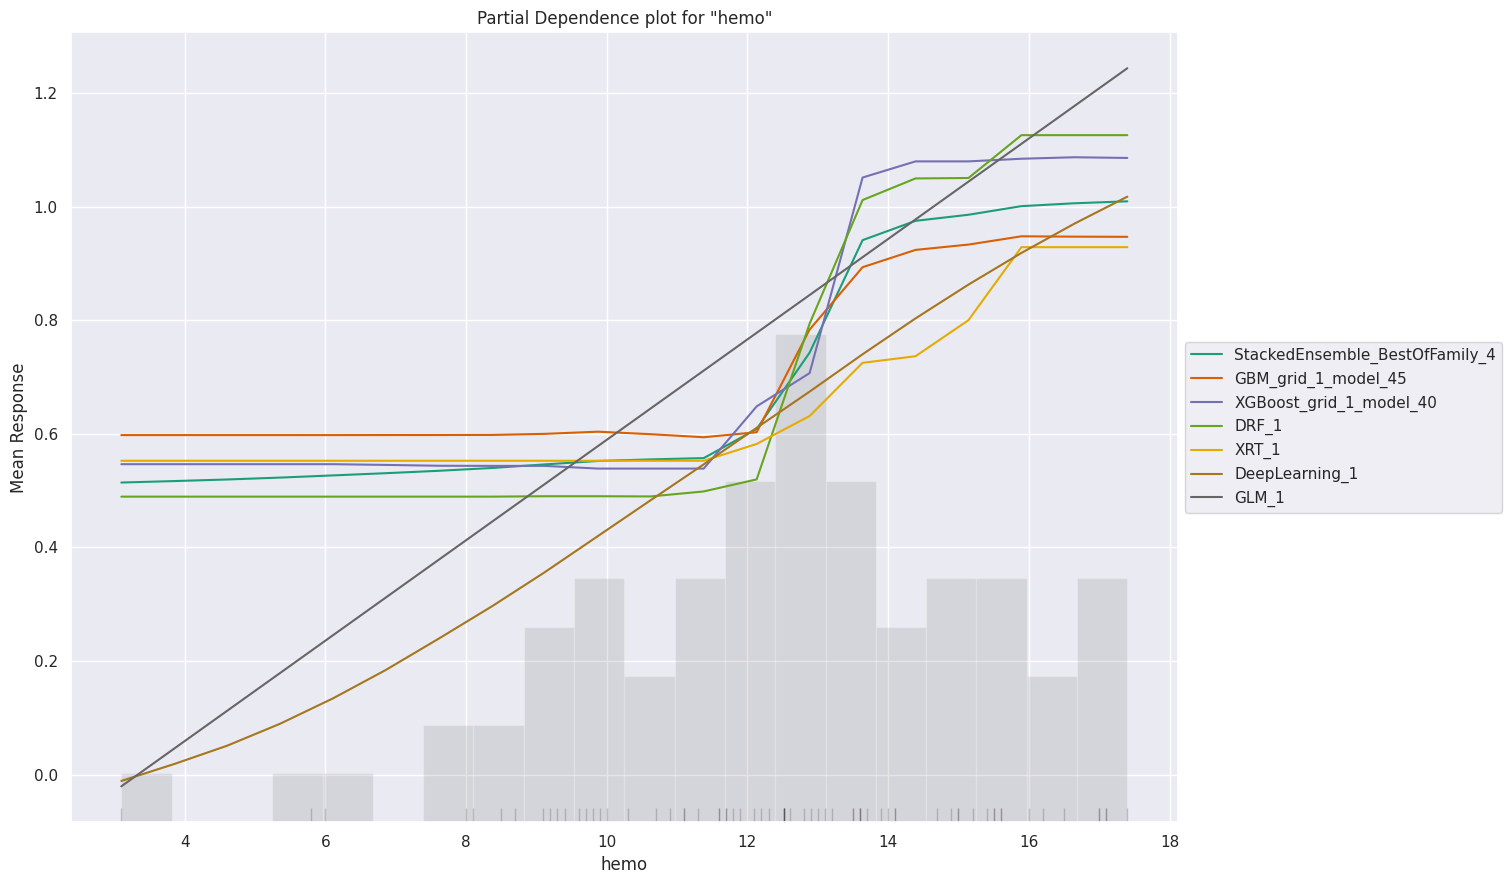

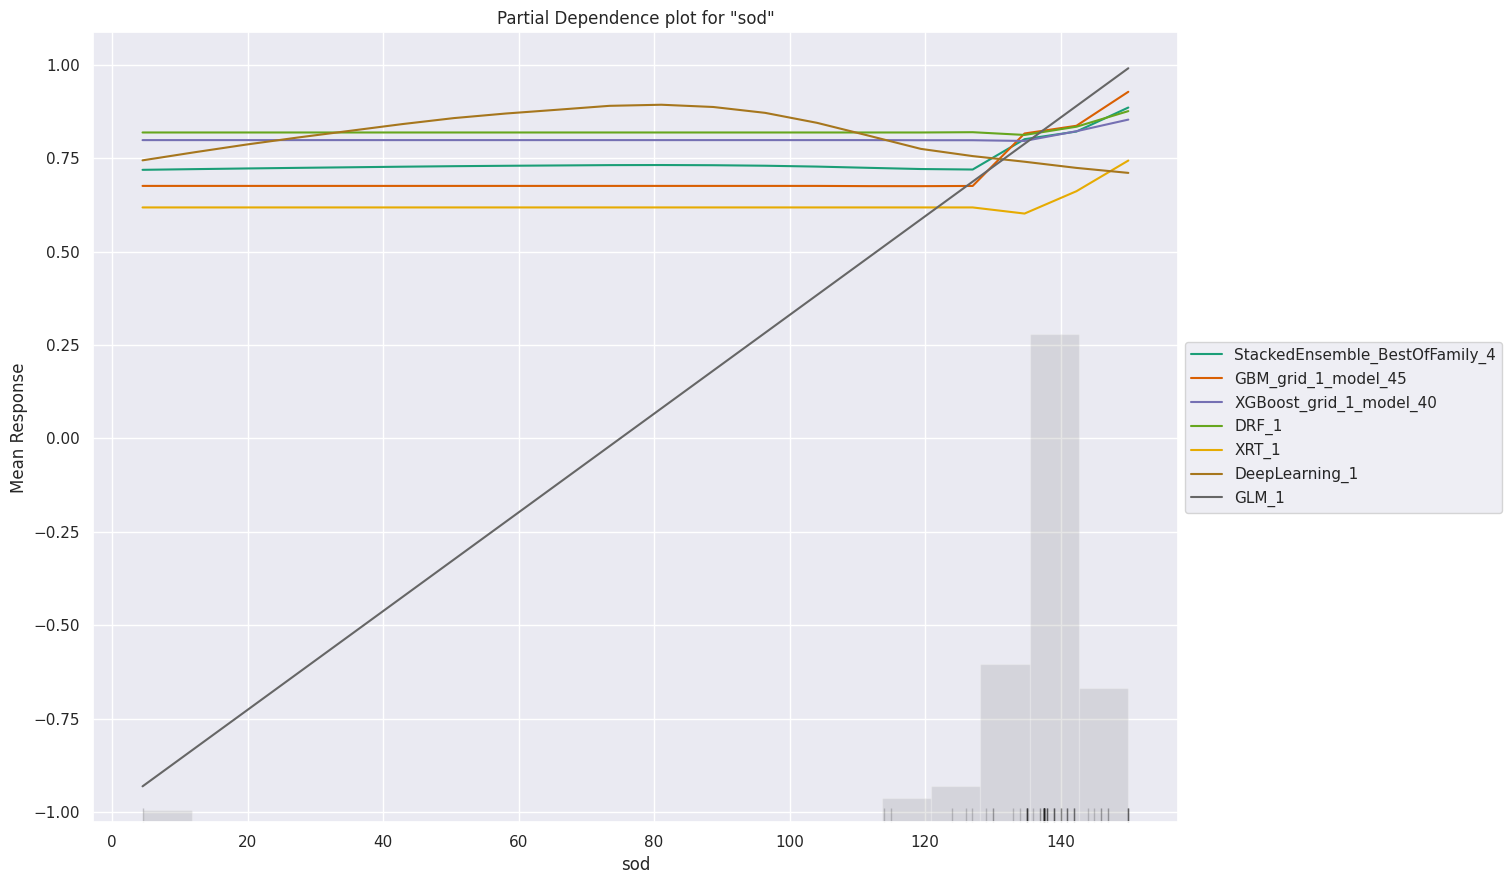

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

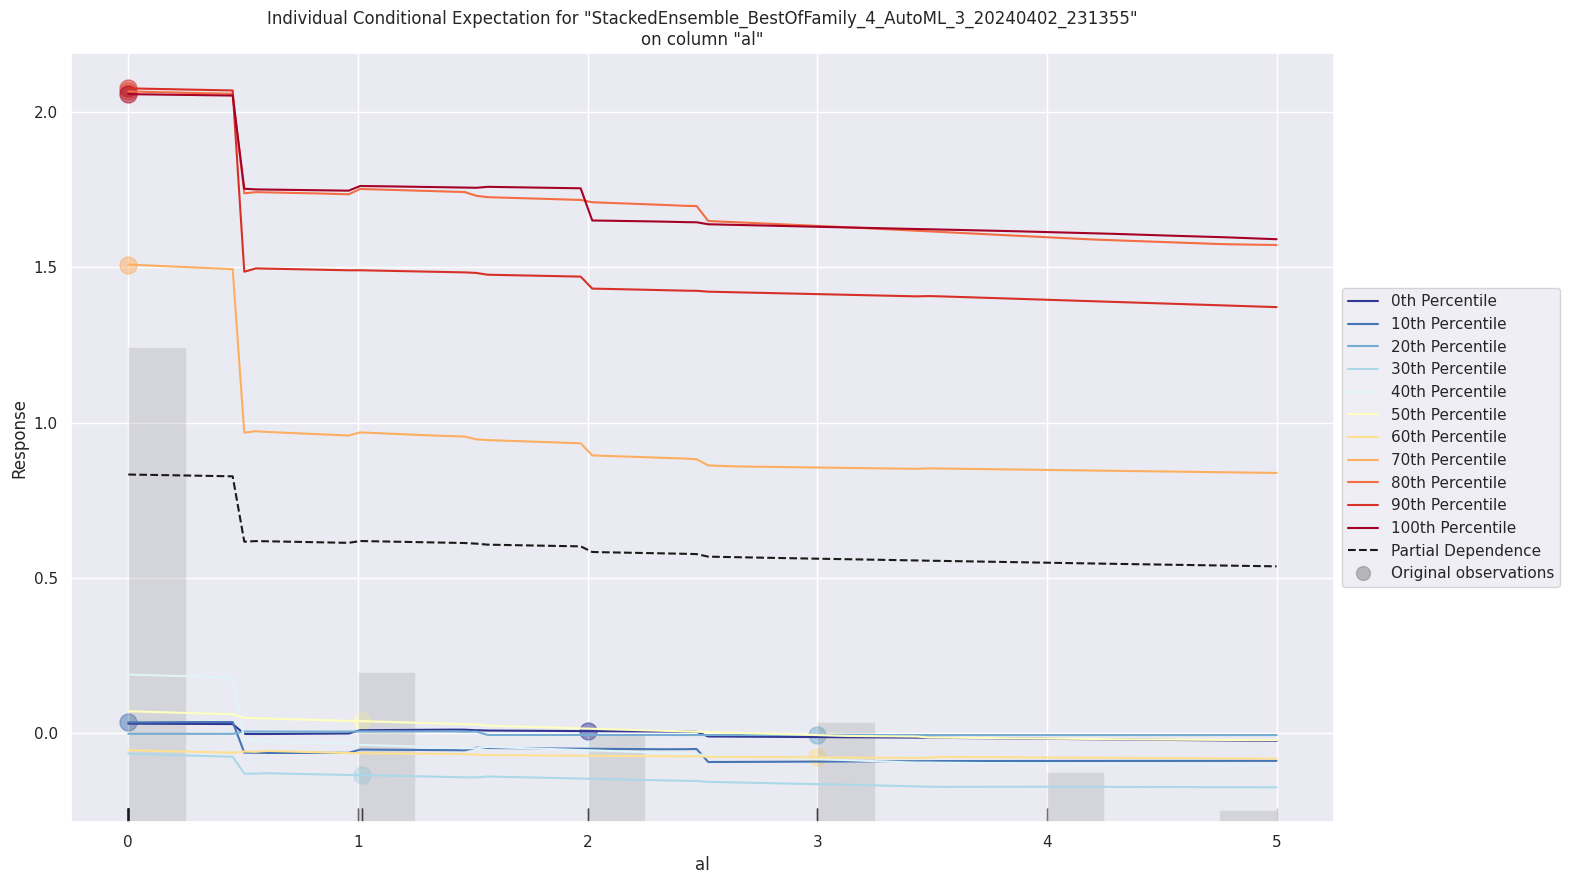

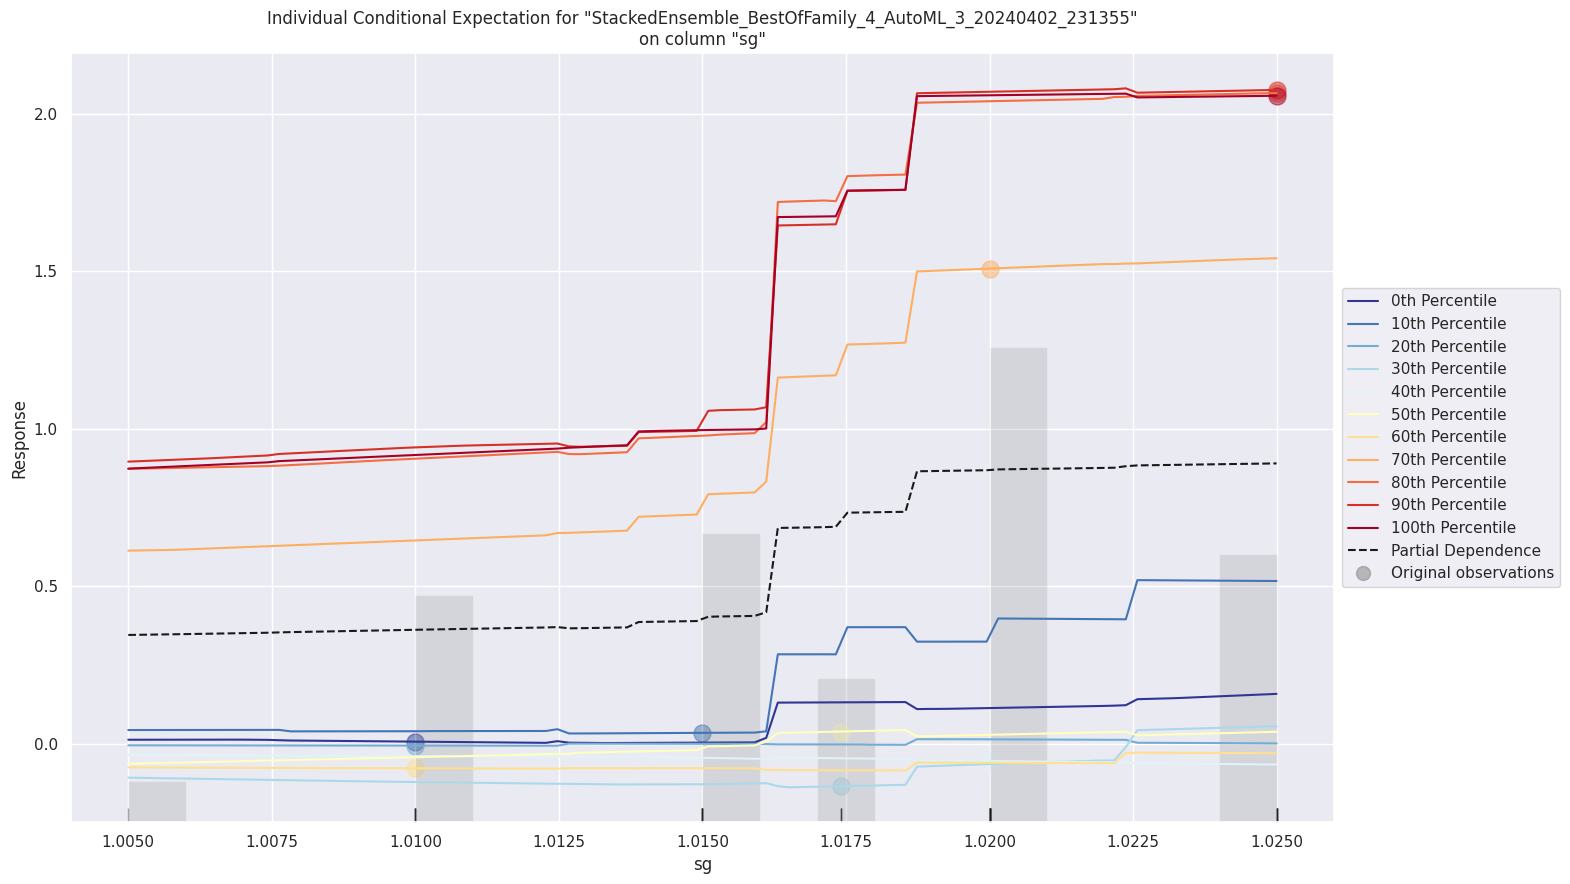

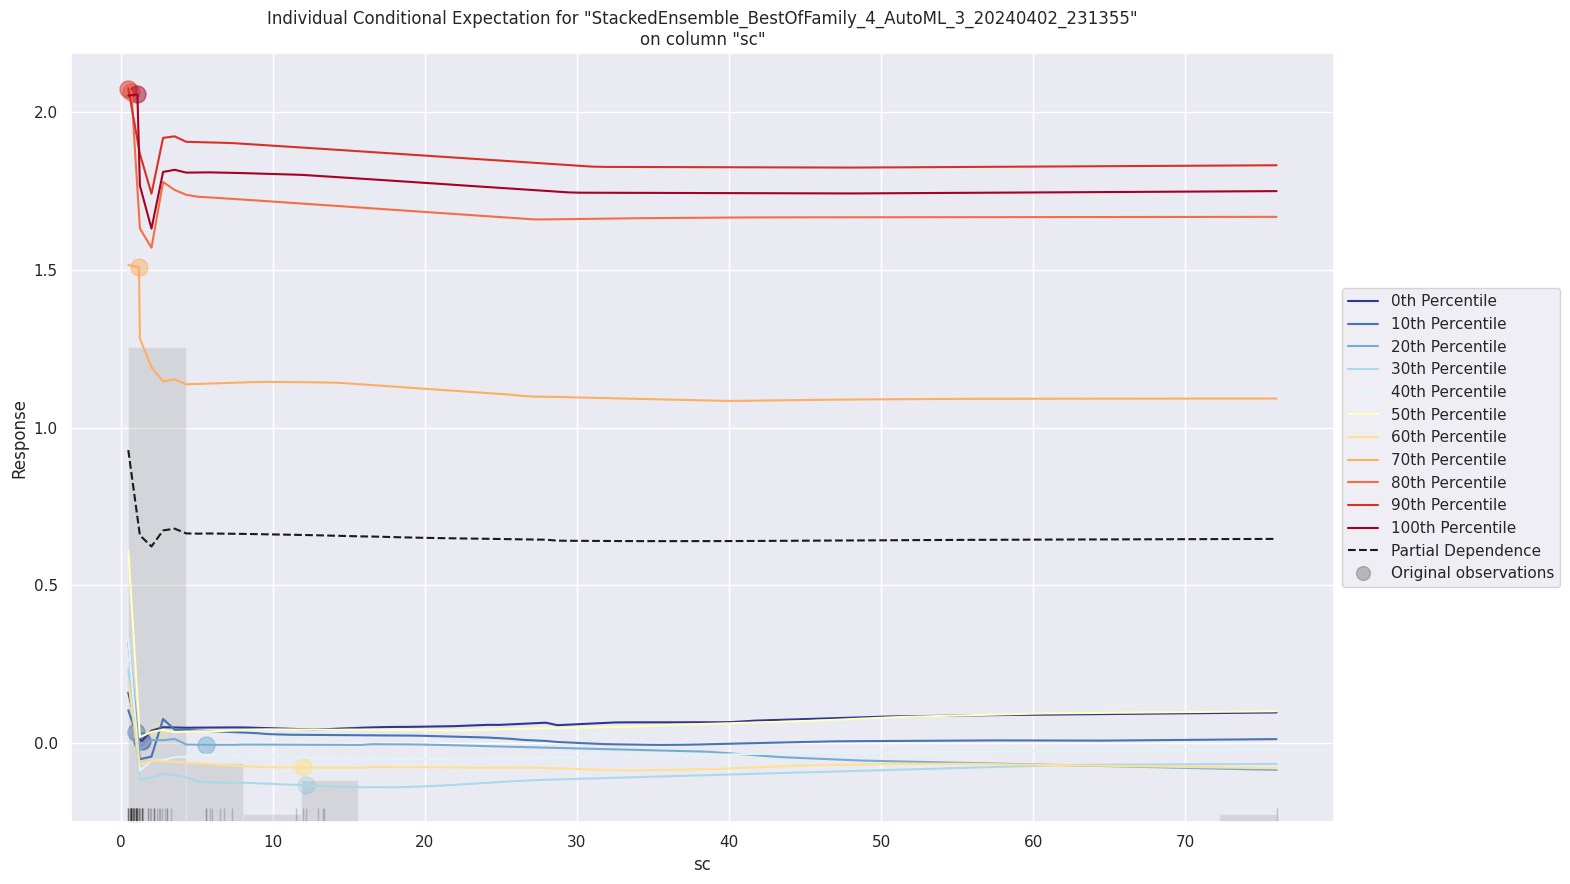

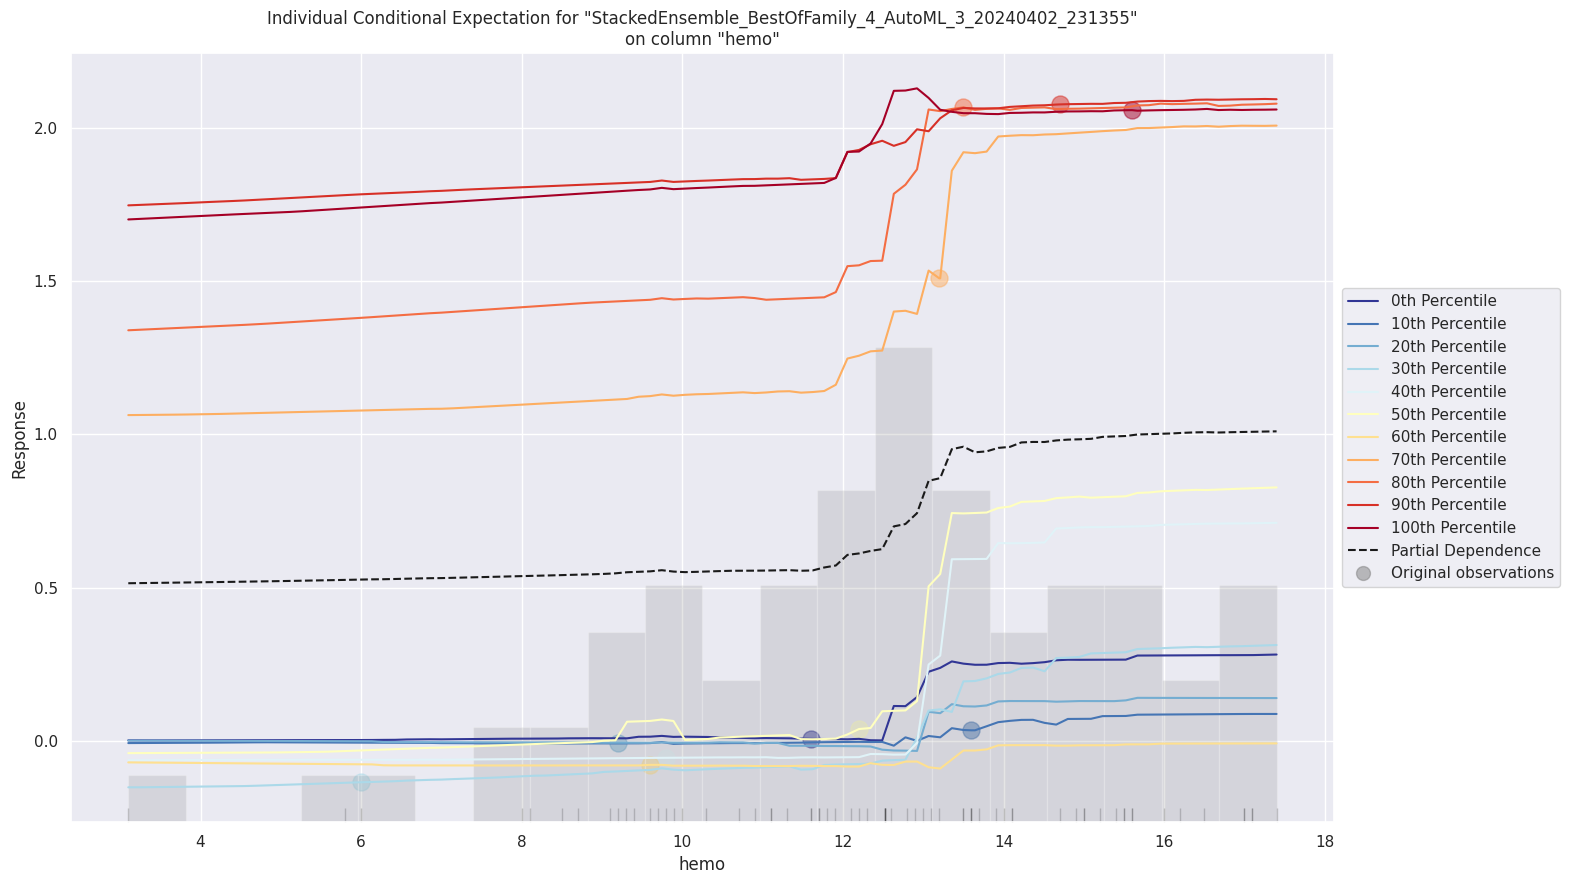

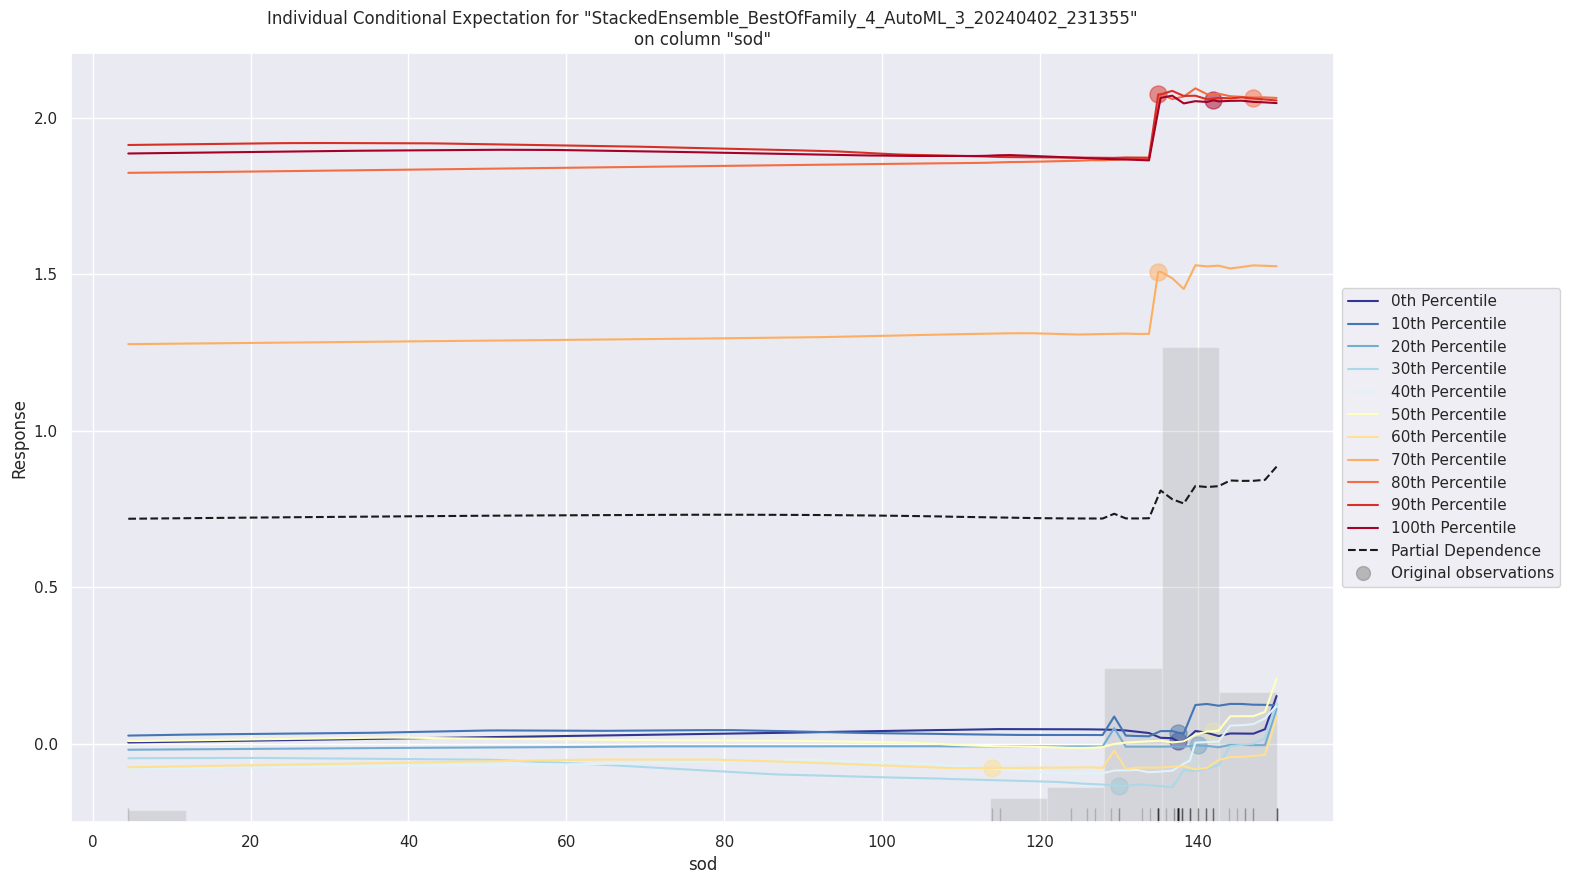

In [ ]:
exa = aml.explain(df1_test)

In [ ]:
!pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 9.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
import shap

  0%|          | 0/80 [00:00<?, ?it/s]

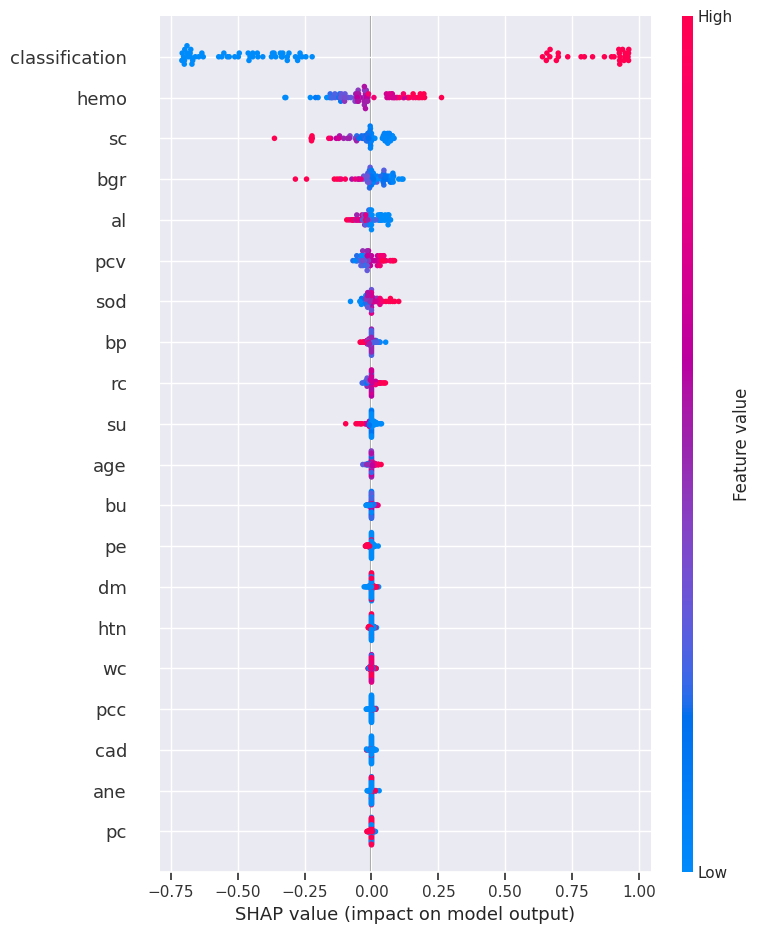

In [ ]:
# Ensure the logistic regression model is fitted
logreg.fit(X_train, y_train)

# After fitting, you can use the model with SHAP's KernelExplainer
explainer_logreg = shap.KernelExplainer(logreg.predict, shap.sample(X_train, 100))  # Using a sample for efficiency
shap_values_logreg = explainer_logreg.shap_values(shap.sample(X_test, 100))

# Visualize the SHAP values for logistic regression
shap.summary_plot(shap_values_logreg, shap.sample(X_test, 100), feature_names=X_test.columns)


In [ ]:
# Fit the Random Forest model
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

  0%|          | 0/80 [00:00<?, ?it/s]

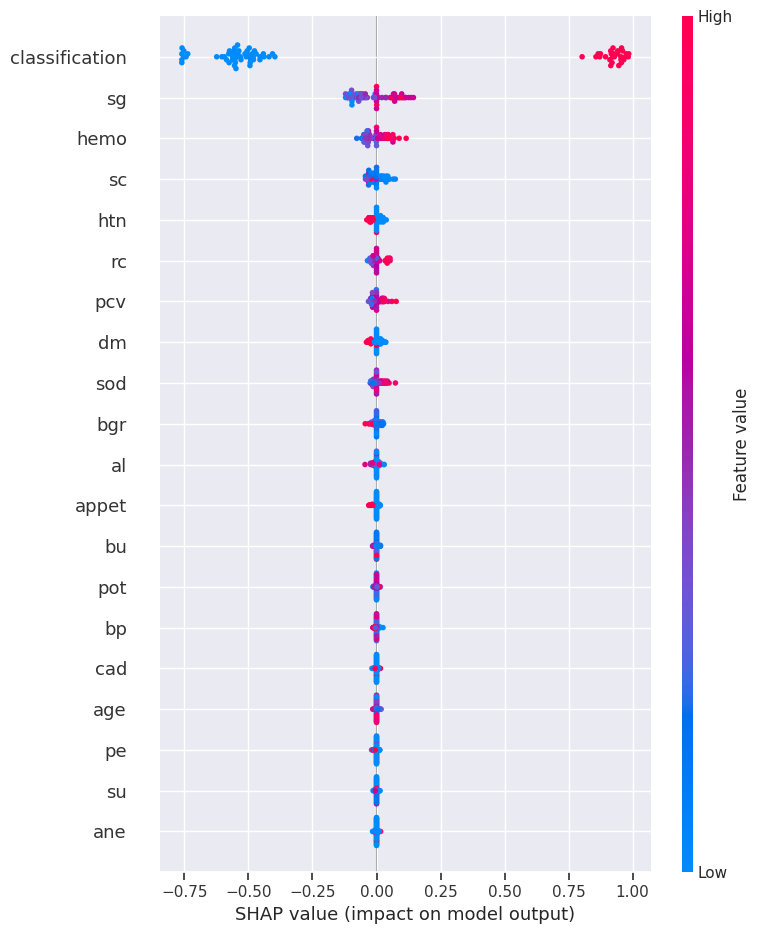

In [ ]:
# Use KernelExplainer for the Random Forest model
# This approach can be computationally intensive; hence, using a sample of the data is recommended
explainer_rf = shap.KernelExplainer(rf.predict, shap.sample(X_train, 100))
shap_values_rf = explainer_rf.shap_values(shap.sample(X_test, 100))

# Visualize the SHAP values for Random Forest
shap.summary_plot(shap_values_rf, shap.sample(X_test, 100), feature_names=X_test.columns)


1 What is the question?
Ans The central question I aimed to address was determining which independent variables significantly predict the outcome of a target variable, particularly in a medical dataset to diagnose a condition like chronic kidney disease.

2 What did I do?
Ans I embarked on a comprehensive data analysis journey, starting with preprocessing tasks such as encoding categorical variables. I employed three different feature selection methods: Recursive Feature Elimination with Logistic Regression, LassoCV, and Random Forest feature importance analysis. For model development, I used Logistic Regression and Random Forest classifiers and assessed their performance. I also explored model interpretability through SHAP value analysis to understand the impact of each feature on the prediction.

3 How well did it work?
Ans The methods applied yielded insightful results, allowing me to identify key features that influence the target variable. The models performed satisfactorily, with the Random Forest classifier showing particularly promising results in terms of feature importance. Although I faced challenges in calculating SHAP values for Logistic Regression due to compatibility issues, I successfully computed them for the Random Forest model, which offered valuable interpretative insights.

4 What did I learn?
Ans This project was a deep dive into the practical application of machine learning in a real-world context. I learned not only about the technical aspects of feature selection and model training but also about the critical importance of model interpretability in the medical field. Handling various data types and learning to apply different feature selection methods enhanced my analytical skills. Additionally, the experience with SHAP values underscored the significance of understanding the decision-making process of machine learning models, especially in healthcare, where interpretability is as crucial as accuracy.







In this project, I delved into the complexities of predicting a critical medical condition, leveraging a dataset with diverse features. Through meticulous data preprocessing and encoding, I ensured a robust foundation for feature analysis and model training. By applying three distinct feature selection techniques—Recursive Feature Elimination with Logistic Regression, LassoCV, and Random Forest feature importance—I discerned key variables that most significantly predict the target condition.

The models, Logistic Regression and Random Forest, were evaluated for their predictive accuracy and ability to generalize from the training data. The Random Forest model, in particular, stood out for its performance and offered insightful feature importance metrics, which were further explored through SHAP analysis. Despite initial challenges in calculating SHAP values for the Logistic Regression model, I gained valuable insights from the interpretability analysis of the Random Forest model.

This endeavor illuminated the critical interplay between feature selection, model choice, and interpretability in machine learning, especially in a domain as consequential as healthcare. The project underscored the necessity of not only achieving high predictive accuracy but also ensuring that the models provide actionable insights through interpretable results. These insights are vital for healthcare professionals to trust and effectively act upon the model's predictions.

Ultimately, this project was a profound learning experience that reinforced the importance of a methodical and insightful approach to data science problems, especially in sectors where decisions can have significant impacts on human lives.

References:- * H20.ai- https://docs.h2o.ai/

OLS Model- http://net-informations.com/ds/mla/ols.html

Linear Regression- https://www.analyticsvidhya.com/blog/2021/05/all-you-need-to-know-about-your-first-machine-learning-model-linear-regression/

Linear Regression Assumptions- https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/assumptions-of-linear-regression/

Github Link- https://github.com/vikram17036/DSMT?tab=MIT-1-ov-file#readme

Dataset- https://www.kaggle.com/datasets/mansoordaku/ckdisease ChatGPT-https://chat.openai.com/

Github(Reference given by professor) - https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/AutoML_Wine_Quality.ipynb

MIT License

Copyright (c) 2024 vikram17036

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.